 -----------------------------------------------------------------------------------------------------------------------

GRUPO: PL3 - 6

Magda Costa - up202207036

Rafael Pacheco - up202206258

Sofia Machado - up202207203

 -----------------------------------------------------------------------------------------------------------------------

# Decision Trees


## Índice  <a name = "indice"></a>
1. [Introdução](#introdução)
2. [Análise Datasets](#datasets)
    - [Restaurant](#restaurant)
    - [Weather](#weather)
    - [Iris](#iris)
    - [Connect4](#connect4)
3. [DecisionTreeClassifier](#dtc)
    - [Generalização](#dtc_gen)
    - [Restaurant](#dtc_rest)
        - [Árvore de Decisão](#ad_rest)
        - [Testes](#test_rest)
    - [Weather](#dtc_weather)
        - [Árvore de Decisão](#ad_weather)
        - [Testes](#test_weather)
    - [Iris](#dtc_iris)
        - [Árvore de Decisão](#ad_iris)
        - [Testes](#test_iris)
    - [Connect4](#dtc_connect4)
        - [Árvore de Decisão](#ad_connect4)
        - [Testes](#test_connect4)
4. [Teste Final](#teste)
    - [Restaurant - Árvore Final](#rest_ad)
    - [Weather - Árvore Final](#weather_ad)
5. [Jogo](#jogo)
    - [Teste Jogo](#jogo_teste)
    - [Quem foi o melhor?](#best)
6. [Faça os seus Testes](#faça_testes)
7. [Conclusão](#conclusão)

# Introdução <a name = "introdução"></a>
[[voltar ao índice]](#indice)

Este trabalho consiste na construção e implementação de árvores de decisão, focando-se na criação de um algoritmo de indução de árvores de decisão utilizando o ID3. O objetivo é desenvolver um programa que lê um conjunto de dados em formato CSV, constrói a árvore de decisão com base na entropia dos atributos, e utiliza esta árvore para classificar novos exemplos.

Para este projeto, utilizaremos quatro conjuntos de dados distintos: "restaurant", "weather", "iris" e "Connect Four". Cada conjunto de dados apresenta características e desafios específicos, que irão testar a robustez e a eficácia das nossas árvores.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
import random
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac

# Análise Datasets <a name = "datasets"></a>
[[voltar ao índice]](#indice)

Nesta parte do trabalho vamos analisar detalhadamente cada dataset. Deste modo será possivel determinar quais as peculiariedades de cada um e definir qual o melhor modo de tratar cada um deles. Para esse efeito em cada dataset serão analisados os seguintes aspetos, se necessário:

    - Análise geral dos dados (ver o tipo de dados de cada dataset)
    - Missing values
    - Análise de 'Class'
    - Análise dos Valores Nominais
    - Remoção ou Substituição de Dados
    - Compliacações nos datasets
        - Classes sobrepostas
        - Presença de Outliers
        - Variáveis Irrelevantes ou Altamente Correlacionadas
        - Classes Desbalanceadas

## Restaurant <a name = "restaurant"></a>
[[voltar a Análise Datasets]](#datasets)

### 1. Análise Geral dos Dados

In [2]:
# Leitura do dataset 'restaurant'
df_rest = pd.read_csv("restaurant.csv")

In [3]:
# Visualização de parte do dataset
df_rest.head()

,ID,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,X1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,X2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,X3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,X4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,X5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [4]:
df_rest.dtypes

ID       object
Alt      object
Bar      object
Fri      object
Hun      object
Pat      object
Price    object
Rain     object
Res      object
Type     object
Est      object
Class    object
dtype: object

Tendo em conta o tipo de dados deste dataset concluimos que são todos do tipo object.

Existem 11 features.

### 2. Missing Values

In [5]:
df_rest.isnull().sum()

ID       0
Alt      0
Bar      0
Fri      0
Hun      0
Pat      0
Price    0
Rain     0
Res      0
Type     0
Est      0
Class    0
dtype: int64

Concluimos que não há valores em falta.

### 3. Análise de 'Class'

In [6]:
# Ver quantos valores distintos tem 'Class'
list_diff = df_rest['Class'].unique()
print(list_diff)
print(len(list_diff))

['Yes' 'No']
2


Este dataset apenas tem 2 opções de classificação.

### 4. Análise dos Valores Nominais

In [7]:
# Ver quantos valores nominais existem que não sejam de 'Class'

colunas = ['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est']

for col in colunas:
    print(col + ":")
    list_diff = df_rest[col].unique()
    print(list_diff)
    print(len(list_diff))
    
    if col != colunas[-1]:
        print()

Alt:
['Yes' 'No']
2

Bar:
['No' 'Yes']
2

Fri:
['No' 'Yes']
2

Hun:
['Yes' 'No']
2

Pat:
['Some' 'Full' 'None']
3

Price:
['$$$' '$' '$$']
3

Rain:
['No' 'Yes']
2

Res:
['Yes' 'No']
2

Type:
['French' 'Thai' 'Burger' 'Italian']
4

Est:
['0-10' '30-60' '10-30' '>60']
4


Ao analisarmos estes dados percebemos que não há muitos valores distintos por coluna, o que é vantajoso caso seja necessário passá-los para valores inteiros.

### 5. Remoção ou Substituição de Dados

Após analisarmos de um modo muito geral os dados, concluimos que a coluna 'ID' não é muito relevante para este dataset, uma vez que não nos permite tirar qualquer tipo de conclusão acerca dos dados, apenas estamos a enumerá-los. Iremos, portanto, removê-la.

In [8]:
# Remover a coluna 'ID'
df_rest.drop('ID', axis=1, inplace=True)

In [9]:
# Ver se a remoção foi bem efetuada
df_rest.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


Passamos a ter 10 features.

### 6. Complicações nos datasets

Até ao momento sabemos que o dataset não possui missing values e que a dimensionalidade é relativamente elevada tendo em conta que apresenta 10 features.

Com o objetivo de tentar perceber se este dataset possui algum 'problema' que não seja facilmente identificado através da análise geral realizada, iremos agora tentar entender que problemas é que podem estar presentes. Assim sendo, vamos transformar todos os valores em inteiros de modo a que seja possivel visualizar os dados, por exemplo em gráficos. De notar que iremos fazer uma cópia do estado atual do dataset, pois esta mudança apenas será utilizada para a visualização dos dados e não para a sua testagem na DecisionTree por nós criada.

In [10]:
# Cópia do dataset atual onde iremos fazer a alteração dos dados para visualização
df_rest_num = df_rest.copy()

In [11]:
# Mudar todos os dados para valores numéricos:
colunas = ['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est', 'Class']

for col in colunas:
    list_diff = df_rest_num[col].unique()
    subs = {}
    for i in range(len(list_diff)):
        subs[list_diff[i]] = i
    df_rest_num[col] = df_rest_num[col].map(subs)

Vamos apenas confirmar se as alterações foram realizadas corretamente.

In [12]:
print(df_rest_num)

    Alt  Bar  Fri  Hun  Pat  Price  Rain  Res  Type  Est  Class
0     0    0    0    0    0      0     0    0     0    0      0
1     0    0    0    0    1      1     0    1     1    1      1
2     1    1    0    1    0      1     0    1     2    0      0
3     0    0    1    0    1      1     0    1     1    2      0
4     0    0    1    1    1      0     0    0     0    3      1
5     1    1    0    0    0      2     1    0     3    0      0
6     1    1    0    1    2      1     1    1     2    0      1
7     1    0    0    0    0      2     1    0     1    0      0
8     1    1    1    1    1      1     1    1     2    3      1
9     0    1    1    0    1      0     0    0     3    2      1
10    1    0    0    1    2      1     0    1     1    0      1
11    0    1    1    0    1      1     0    1     2    1      0


Concluimos que sim.

Para efeitos de simplicação na visualização dos graficos dividimos o dataset em duas partes:

In [13]:
# Definir atributos e target
X = df_rest_num[['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est']]
y = df_rest_num['Class']

#### Classes Sobrepostas

O problema das classes sobrepostas ocorre quando as diferentes categorias de dados não estão claramente separadas umas das outras. Quando isto acontece, torna-se dificil para um sistema de classificação distinguir com precisão essas classes. Tal pode ocorrer devido à falta de características distintivas entre as categorias, presença de ruído nos dados ou complexidade do problema de classificação.

No caso deste dataset, uma vez que o mesmo possui 10 atributos, o número de gráficos gerados será bastante elevado, pois para garantir que não há sobreposição de classes é necessário testar todos os pares distintos de classes possiveis.

De modo a facilitar a criação de todos os conjuntos possiveis de 2 classes iremos utilizar a biblioteca itertools:

In [14]:
import itertools

In [15]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
atributos = ['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est']

combinacoes = list(itertools.combinations(atributos, 2))

Como podemos confirmar foram gerados todos os pares possiveis de classes distintas: 

In [16]:
print(combinacoes)

[('Alt', 'Bar'), ('Alt', 'Fri'), ('Alt', 'Hun'), ('Alt', 'Pat'), ('Alt', 'Price'), ('Alt', 'Rain'), ('Alt', 'Res'), ('Alt', 'Type'), ('Alt', 'Est'), ('Bar', 'Fri'), ('Bar', 'Hun'), ('Bar', 'Pat'), ('Bar', 'Price'), ('Bar', 'Rain'), ('Bar', 'Res'), ('Bar', 'Type'), ('Bar', 'Est'), ('Fri', 'Hun'), ('Fri', 'Pat'), ('Fri', 'Price'), ('Fri', 'Rain'), ('Fri', 'Res'), ('Fri', 'Type'), ('Fri', 'Est'), ('Hun', 'Pat'), ('Hun', 'Price'), ('Hun', 'Rain'), ('Hun', 'Res'), ('Hun', 'Type'), ('Hun', 'Est'), ('Pat', 'Price'), ('Pat', 'Rain'), ('Pat', 'Res'), ('Pat', 'Type'), ('Pat', 'Est'), ('Price', 'Rain'), ('Price', 'Res'), ('Price', 'Type'), ('Price', 'Est'), ('Rain', 'Res'), ('Rain', 'Type'), ('Rain', 'Est'), ('Res', 'Type'), ('Res', 'Est'), ('Type', 'Est')]


Passamos agora então para a visualização dos dados através de scatterplots:

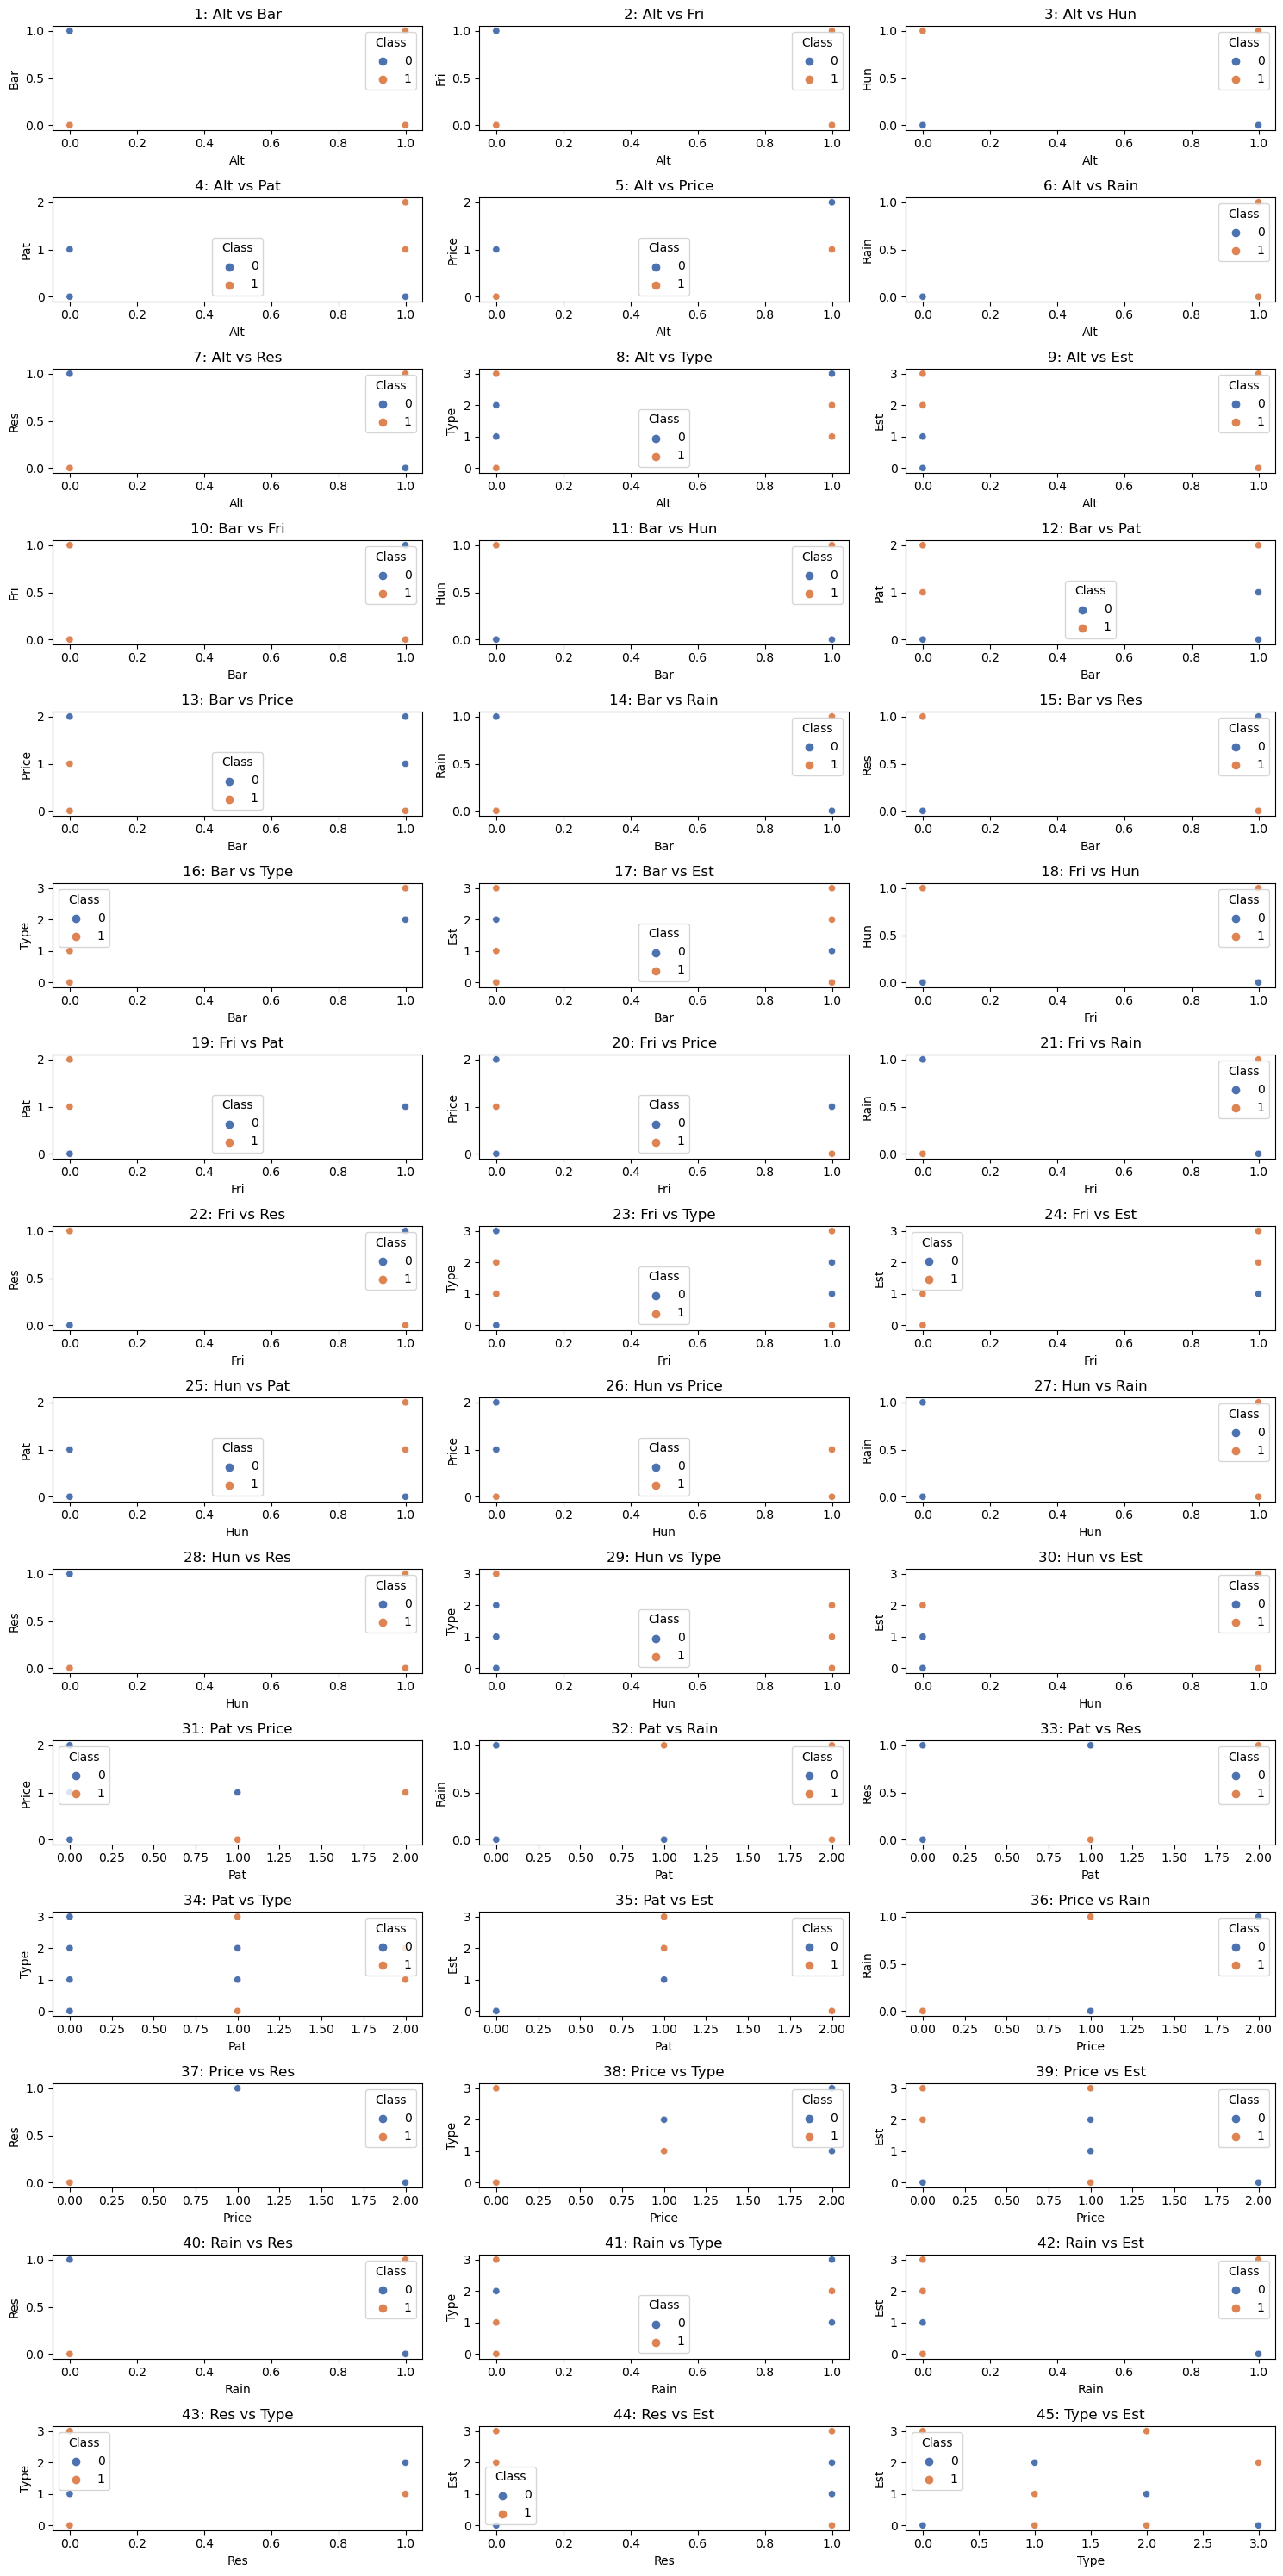

In [17]:
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(atributos, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_rest_num['Class'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

Tendo em conta que o dataset era inicialmente composto apenas por dados do tipo 'object', uma vez que em cada atributo havia no máximo 4 valores distintos e que em maior parte desses atributos havia apenas 2 valores distintos, não é possivel ver todos os pontos que deveriam aparecer. Tal deve-se ao facto de estes se sobreporem, no entanto, não significa necessáriamente que as classes sejam sobrepostas. Na realidade não parece haver sobreposição de classes.

De modo a tentar perceber se as classes são realmente sobrepostas ou não, iremos utilizar a técnica PCA (Principal Component Analysis). Esta tem como finalidade reduzir a dimensionalidade de um determinado dataset e é comumente usada para simplificar conjuntos de dados complexos, mantendo as informações mais importantes. Neste caso iremos usá-la para determinar se as classes são sobrepsotas ou não, uma vez que o PCA pode ajudar indiretamente ao reduzir a dimensionalidade dos dados. Se as classes estiverem sobrepostas em um espaço de alta dimensionalidade, é mais provável que sejam separadas em um espaço de dimensionalidade inferior após a aplicação do PCA, especialmente se as componentes principais retiverem a maior parte da variação nos dados. De notar que o PCA por si só não deve ser utilizado para avaliar a sobreposição de classes.

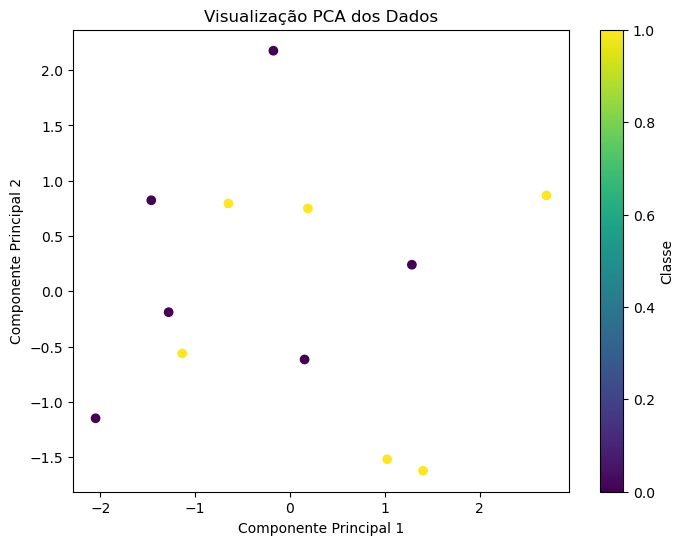

In [18]:
from sklearn.decomposition import PCA

# Inicializa o PCA com 2 componentes (para visualização em 2D)
pca = PCA(n_components=2)

# Aplica o PCA aos seus dados
X_pca = pca.fit_transform(X)

# Plota os dados no novo espaço de características PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_rest_num['Class'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização PCA dos Dados')
plt.colorbar(label='Classe')
plt.show()

Após visualizarmos os scatterplots e o gráfico acima, concluimos que não há sobreposição de classes.

#### Presença de Outliers

O problema dos outliers refere-se à presença de pontos de dados que são significativamente diferentes dos restantes do conjunto de dados. Esses pontos são "outliers" porque estão fora do padrão ou da tendência geral dos dados. Eles podem influenciar negativamente a média e o desvio padrão, levando a estimativas imprecisas. Além disso, podem distorcer visualizações gráficas e interpretações dos dados.

Gerenciar outliers pode envolver a detecção e remoção desses pontos, usando métodos estatísticos, visualizações de dados ou abordagens específicas de modelagem. No entanto, é crucial entender a natureza dos outliers antes de decidir como lidar com eles, pois às vezes podem fornecer informações valiosas sobre padrões ou eventos incomuns nos dados.

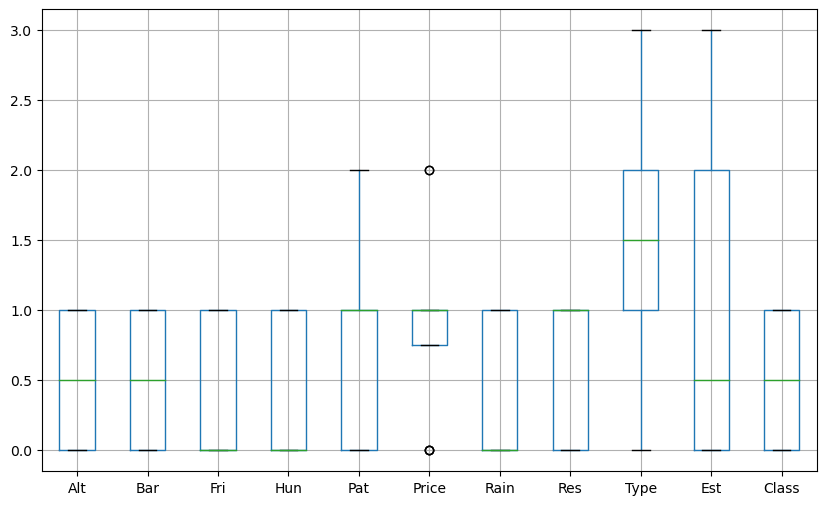

In [19]:
#Restaurant
df_rest_num.boxplot(figsize=(10, 6))
plt.show()

Concluimos que existem 2 outliers em 'Price', no entanto, o conjunto de dados é muito pequeno, logo a remoção destes outliers pode ser uma decisão delicada. Geralmente, a remoção de outliers é recomendada em conjuntos de dados maiores, não sendo esse o caso, iremos prosseguir a análise de dados sem a sua remoção.

#### Variáveis Irrelevantes ou Altamente Correlacionadas

O problema das variáveis irrelevantes ou altamente correlacionadas surge quando um conjunto de dados contém características que não são úteis para a análise ou quando algumas características estão altamente correlacionadas umas com as outras.

    Variáveis Irrelevantes: São aquelas que não contribuem significativamente para o modelo ou análise estatística. A         inclusão delas pode aumentar a complexidade do modelo sem melhorar a precisão das previsões. Isso pode desperdiçar      recursos computacionais e introduzir ruído nos resultados.

    Variáveis Altamente Correlacionadas: Quando duas ou mais variáveis têm uma forte relação entre si, pode haver              redundância de informações. Isso pode causar problemas de multicolinearidade em modelos de regressão, onde as variáveis independentes estão correlacionadas entre si. A multicolinearidade pode tornar os coeficientes de regressão instáveis ou difíceis de interpretar.

Começamos por tratar de avaliar se há ou não variáveis irrelevantes, para isso calculamos o valor da variância de cada atributo. Caso esses valores sejam muito baixos (muito próximo de 0), pode ser indicativo de que se tratam de variáveis irrelevantes, já que isso significa que se os seus valores se mantêm geralmente inalterados o que pode acabar por dificultar a classificação ou induzir a mesma em erro.

Para este efeito, vamos considerar um limite (threshold) de 0.1 para variância descartável. Ou seja, consideramos os atributos que não tenham um mínimo de variância 0.1 como sendo irrelevantes.

In [20]:
# convencionalmente -> 0.1
threshold = 0.1

selector = VarianceThreshold(threshold)
selector.fit(X)

# obter atributos com baixa variância
selected_features = selector.get_support(indices = True)
removed_features = [feature for feature in range(X.shape[1]) if feature not in selected_features]
print("Features que se podem remover devido à baixa variância:", removed_features)

Features que se podem remover devido à baixa variância: []


Tendo em conta o resultado concluimos que não foram detetados atributos irrelevantes, no entanto, tendo em conta a abordagem da baixa relevância, não podemos descartar a hipótese de que existem atributos irrelevantes.

Passamos à análise das **correlações** entre atributos para avaliar a relevância dos mesmos:

Iremos primeiro criar uma matriz de correlação para que possamos visualizar a correlação dos dados:

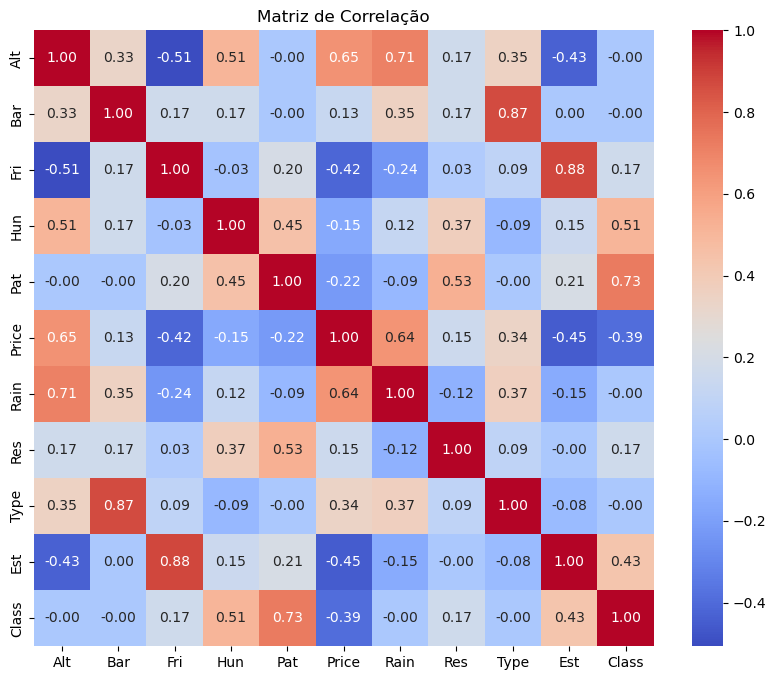

In [21]:
correlation_matrix = df_rest_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

De modo a que não haja dúvidas do grau de correlação entre os atributos desenvolvemos a seguinte função que nos indica se cada par de dados é altamente correlacionado ou não:

In [22]:
def is_corr(correlation_matrix, min_correlation, max_correlation, low=True):
    checked_pairs = set()  # evitar imprimir (a,b) se já imprimiu (b,a)
    found_correlation = False  # Variável para verificar se foi encontrada alguma correlação significativa
    for i in range(correlation_matrix.shape[0]):
        for j in range(i+1, correlation_matrix.shape[1]):
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            if (feature2, feature1) not in checked_pairs and (feature1, feature2) not in checked_pairs:
                correlation = correlation_matrix.iloc[i, j]
                if low:
                    if min_correlation <= correlation <= max_correlation:
                        print(f"Correlação entre '{feature1}' e '{feature2}': {correlation}")
                        found_correlation = True  # Atualiza a variável para indicar que foi encontrada uma correlação
                else:
                    if correlation < min_correlation or correlation > max_correlation:
                        print(f"Correlação entre '{feature1}' e '{feature2}': {correlation}")
                        found_correlation = True  # Atualiza a variável para indicar que foi encontrada uma correlação
            checked_pairs.add((feature1, feature2))
    
    if not found_correlation:  # Se nenhuma correlação significativa foi encontrada
        print("None")

Usamos agora a função desenvolvida para tirarmos conclusões:

In [23]:
correlation_matrix = df_rest_num.corr()
print(correlation_matrix)

print("\n - Correlação muito baixa: ")
is_corr(correlation_matrix,-0.15,0.15)

print("\n - Correlação muito alta: ")
is_corr(correlation_matrix,-0.85,0.85,False)

                Alt           Bar       Fri       Hun           Pat     Price  \
Alt    1.000000e+00  3.333333e-01 -0.507093  0.507093 -2.692686e-17  0.650945   
Bar    3.333333e-01  1.000000e+00  0.169031  0.169031 -1.346343e-17  0.130189   
Fri   -5.070926e-01  1.690309e-01  1.000000 -0.028571  2.049800e-01 -0.418113   
Hun    5.070926e-01  1.690309e-01 -0.028571  1.000000  4.509560e-01 -0.154042   
Pat   -2.692686e-17 -1.346343e-17  0.204980  0.450956  1.000000e+00 -0.221028   
Price  6.509446e-01  1.301889e-01 -0.418113 -0.154042 -2.210281e-01  1.000000   
Rain   7.071068e-01  3.535534e-01 -0.239046  0.119523 -8.574929e-02  0.644402   
Res    1.690309e-01  1.690309e-01  0.028571  0.371429  5.329480e-01  0.154042   
Type   3.481553e-01  8.703883e-01  0.088273 -0.088273 -2.812419e-17  0.339945   
Est   -4.330127e-01  6.409876e-17  0.878310  0.146385  2.100420e-01 -0.450988   
Class -5.551115e-17 -1.850372e-17  0.169031  0.507093  7.276069e-01 -0.390567   

               Rain        

#### Classes Desbalanceadas

O problema das classes desbalanceadas ocorre quando uma ou mais classes em um conjunto de dados estão sub ou sobre-representadas em comparação com outras classes. Isso é comum em problemas de classificação onde uma classe é muito mais frequente do que as outras. Este acontecimento pode levar a problemas como o modelo ter dificuldade em aprender padrões da classe minoritária devido à falta de exemplos dela no conjunto de dados.

In [24]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_rest_num['Class'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_rest_num['Class'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    6
1    6
Name: Class, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    50.0
1    50.0
Name: Class, dtype: float64


Concluimos que 'Class' está **equilibrada** , pois apresenta uma distribuição de 50%, 50%.

## Weather <a name = "weather"></a>
[[voltar a Análise Datasets]](#datasets)

### 1. Análise Geral dos Dados

In [25]:
# Leitura do dataset 'weather'
df_weather = pd.read_csv("weather.csv")

In [26]:
# Visualização de parte do dataset
df_weather.head()

,ID,Weather,Temp,Humidity,Windy,Play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes


In [27]:
df_weather.dtypes

ID           int64
Weather     object
Temp         int64
Humidity     int64
Windy         bool
Play        object
dtype: object

Existem 5 features.

### 2. Missing Values

In [28]:
df_weather.isnull().sum()

ID          0
Weather     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

Concluimos que não há valores nulos.

### 3. Análise de 'Class'

In [29]:
# Ver quantos valores distintos tem 'Class'
list_diff = df_weather['Play'].unique()
print(list_diff)
print(len(list_diff))

['no' 'yes']
2


Este dataset apenas tem 2 opções de classificação.

### 4. Análise dos Valores Nominais

In [30]:
# Ver quantos valores nominais existem que não sejam de 'Class'
print('Weather:')
list_diff = df_weather['Weather'].unique()
print(list_diff)
print(len(list_diff))
print("\n")

print('Windy:')
list_diff = df_weather['Windy'].unique()
print(list_diff)
print(len(list_diff))

Weather:
['sunny' 'overcast' 'rainy']
3


Windy:
[False  True]
2


Ao analisarmos estes dados percebemos que não há muitos valores distintos por coluna, o que é vantajoso caso seja necessário passá-los para valores inteiros. De notar também que analisamos Windy apesar de este ser constituido por valores booleanos.

### 5. Remoção ou Substituição de Dados

Tal como dataset anterior, este possui uma coluna cujo único propósito é enumerar os dados, sendo esta designada de 'ID', por esse motivo, iremos removê-la.

In [31]:
# Remover a coluna 'ID'
df_weather.drop('ID', axis=1, inplace=True)

In [32]:
# Ver se a remoção foi bem efetuada
df_weather.head()

,Weather,Temp,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


Passamos a ter 4 features.

Para que não haja confusões na leitura dos dados iremos mudar o nome da coluna 'Play' para 'Class', uma vez que esta representa o target.

In [33]:
# Mudar a designação da coluna
df_weather = df_weather.rename(columns={'Play': 'Class'})

In [34]:
df_weather['Windy'] = df_weather['Windy'].astype(str)

In [35]:
# Ver se a mudança foi bem sucedida
df_weather.head()

,Weather,Temp,Humidity,Windy,Class
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


### 6. Complicações nos datasets

Até ao momento sabemos que o dataset não possui missing values e que não apresenta dimensionalidade elevada tendo em conta que apresenta 4 features.

Vamos agora passar para uma análise mais aprofundada onde iremos tentar entender que problemas é que este dataset pode possuir. De notar que iremos fazer uma cópia do estado atual do dataset, pois esta mudança apenas será utilizada para a visualização dos dados e não para a sua testagem na DecisionTree por nós criada.

In [36]:
# Cópia do dataset atual onde iremos fazer a alteração dos dados para visualização
df_weather_num = df_weather.copy()

In [37]:
# Mudar todos os dados para valores numéricos:
colunas = ['Weather', 'Windy', 'Class']

for col in colunas:
    list_diff = df_weather_num[col].unique()
    subs = {}
    for i in range(len(list_diff)):
        subs[list_diff[i]] = i
    df_weather_num[col] = df_weather_num[col].map(subs)

Vamos apenas confirmar se as alterações foram realizadas corretamente.

In [38]:
print(df_weather_num)

    Weather  Temp  Humidity  Windy  Class
0         0    85        85      0      0
1         0    80        90      1      0
2         1    83        86      0      1
3         2    70        96      0      1
4         2    68        80      0      1
5         2    65        70      1      0
6         1    64        65      1      1
7         0    72        95      0      0
8         0    69        70      0      1
9         2    75        80      0      1
10        0    75        70      1      1
11        1    72        90      1      1
12        1    81        75      0      1
13        2    71        91      1      0


Concluimos que sim.

Para efeitos de simplicação na visualização dos graficos dividimos o dataset em duas partes:

In [39]:
# Definir atributos e target
X = df_weather_num[['Weather','Temp','Humidity','Windy']]
y = df_weather_num['Class']

#### Classes Sobrepostas

Vamos repetir o processo acima mencionado.

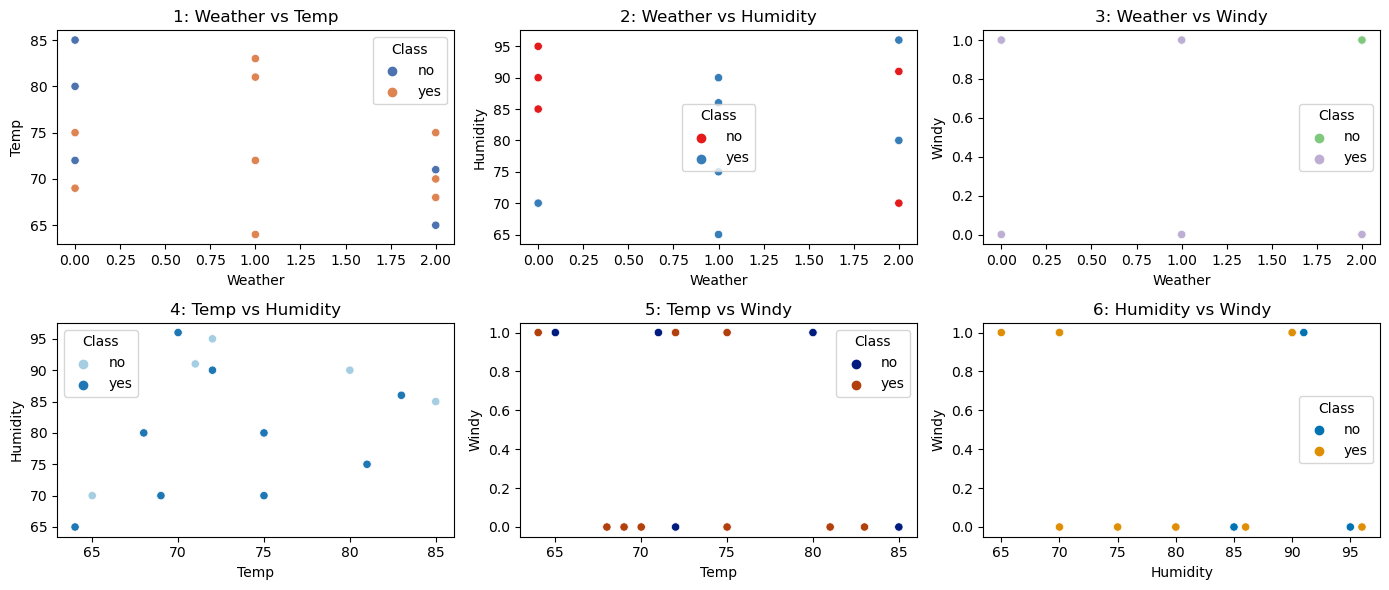

In [40]:
# Ver se existem classes sobrepostas -> considerar cada par de dados possível

color_types = ["deep", "Set1", "Accent", "Paired", "dark", "colorblind"]

# Define o tamanho da figura
plt.figure(figsize=(14, 6))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate([('Weather', 'Temp'), ('Weather', 'Humidity'),
                            ('Weather', 'Windy'), ('Temp', 'Humidity'),
                            ('Temp', 'Windy'), ('Humidity', 'Windy')]):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X[x], y=X[y], hue=df_weather['Class'], palette=color_types[i])
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

Em resumo, os gráficos mostram que a sobreposição das classes não é um problema nas combinações de variáveis analisadas, com exceção de "Weather vs Windy" que parece ter pouca capacidade de distinção entre as classes.

#### Presença de Outliers

O problema dos outliers refere-se à presença de pontos de dados que são significativamente diferentes dos restantes do conjunto de dados. Esses pontos são "outliers" porque estão fora do padrão ou da tendência geral dos dados. Eles podem influenciar negativamente a média e o desvio padrão, levando a estimativas imprecisas. Além disso, podem distorcer visualizações gráficas e interpretações dos dados.

Gerenciar outliers pode envolver a detecção e remoção desses pontos, usando métodos estatísticos, visualizações de dados ou abordagens específicas de modelagem. No entanto, é crucial entender a natureza dos outliers antes de decidir como lidar com eles, pois às vezes podem fornecer informações valiosas sobre padrões ou eventos incomuns nos dados.

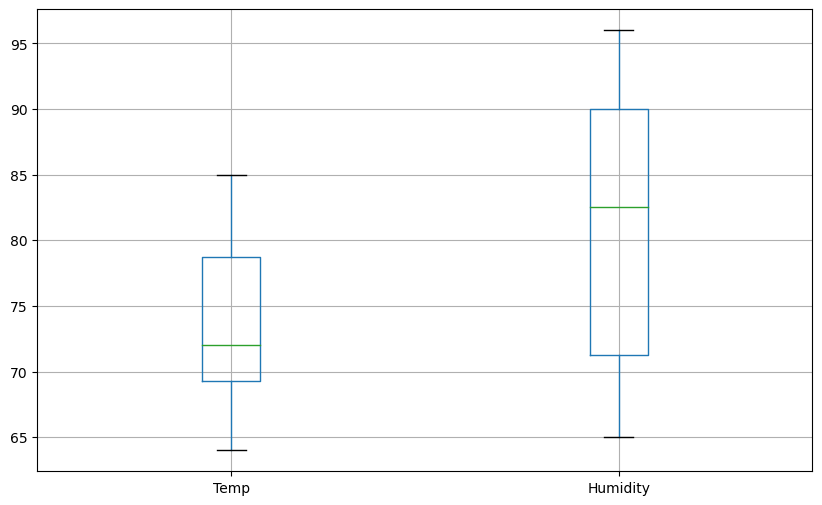

In [41]:
#Weather
df_weather.boxplot(figsize=(10, 6))
plt.show()

#### **`Normalização das variáveis`**

Para modelos que são sensíveis à escala das variáveis, a normalização pode ajudar a mitigar o impacto dos outliers. No nosso caso, para podermos observar os valores numa escala de 0 a 1, iremos utilizar a normalização.

In [42]:
# Cópia dos dados onde vamos fazer a normalização
df_weather_norm = df_weather.copy()

In [43]:
# Atualizando diretamente as colunas 'Temp' e 'Humidity' com os valores normalizados
df_weather_norm['Temp'] = (df_weather_norm['Temp'] - df_weather_norm['Temp'].min()) / (df_weather_norm['Temp'].max() - df_weather_norm['Temp'].min())
df_weather_norm['Humidity'] = (df_weather_norm['Humidity'] - df_weather_norm['Humidity'].min()) / (df_weather_norm['Humidity'].max() - df_weather_norm['Humidity'].min())

In [44]:
df_weather.head()

,Weather,Temp,Humidity,Windy,Class
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [45]:
df_weather_norm.head()

,Weather,Temp,Humidity,Windy,Class
0,sunny,1.000000,0.645161,False,no
1,sunny,0.761905,0.806452,True,no
2,overcast,0.904762,0.677419,False,yes
3,rainy,0.285714,1.000000,False,yes
4,rainy,0.190476,0.483871,False,yes


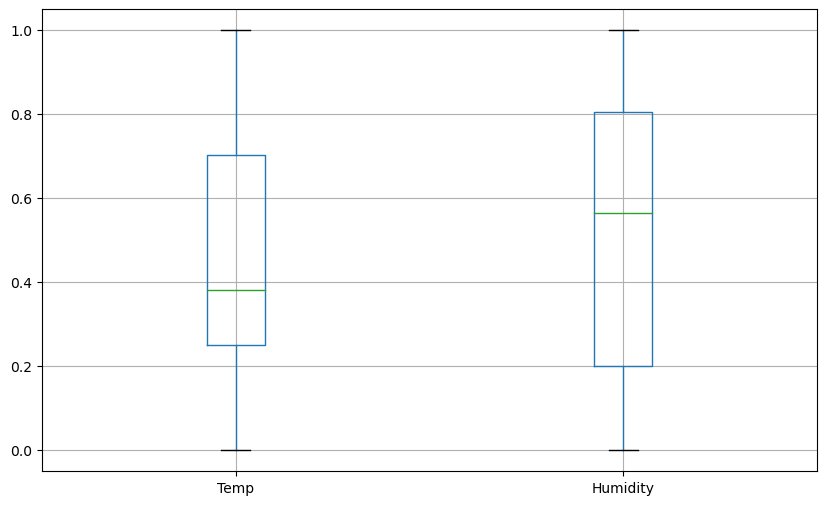

In [46]:
#Weather
df_weather_norm.boxplot(figsize=(10, 6))
plt.show()

Concluimos que não existem outliers no dataset 'Weather'.

#### Variáveis Irrelevantes ou Altamente Correlacionadas

Vamos começar por calcular a **variância** de cada atributo. Isto porque se o seu valor for muito baixo (muito próximo de 0), pode ser indicativo de variâveis irrelevantes, já que isso significa que se os seus valores se mantêm geralmente inalterados o que pode acabar por dificultar a classificação ou induzir a mesma em erro.

Para este efeito, vamos considerar um limite (**threshold**) de 0.1 para variância descartável. Ou seja, consideramos os atributos que não tenhm um mínimo de variância **0.1** como sendo irrelevantes.

In [47]:
# convencionalmente -> 0.1
threshold = 0.1

selector = VarianceThreshold(threshold)
selector.fit(X)

# obter atributos com baixa variância
selected_features = selector.get_support(indices = True)
removed_features = [feature for feature in range(X.shape[1]) if feature not in selected_features]
print("Features que se podem remover devido à baixa variância:", removed_features)

Features que se podem remover devido à baixa variância: []


Tendo em conta o resultado concluimos que não foram detetados atributos irrelevantes, no entanto, tendo em conta a abordagem da baixa relevância, não podemos descartar a hipótese de que existem atributos irrelevantes.

Passamos à análise das **correlações** entre atributos para avaliar a relevância dos mesmos:

Iremos primeiro criar uma matriz de correlação para que possamos visualizar a correlação dos dados:

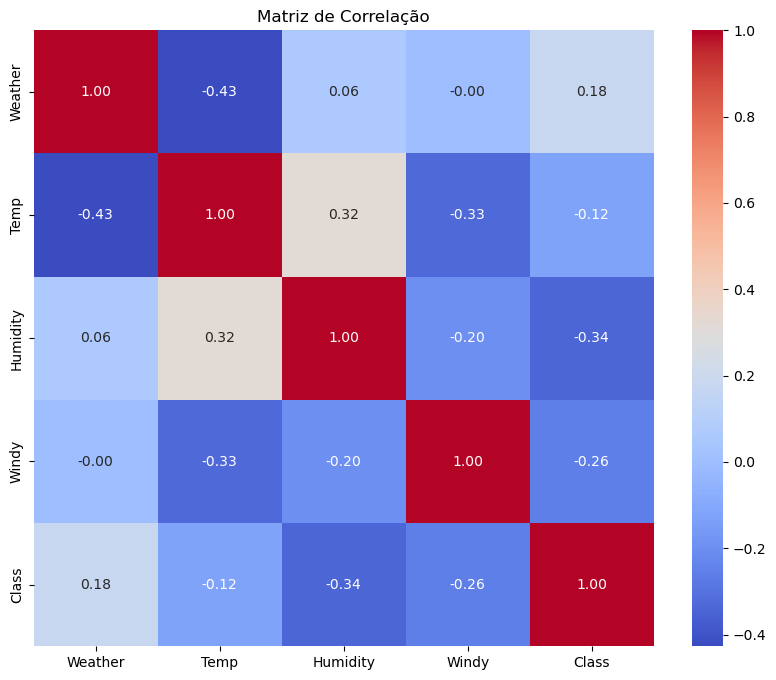

In [48]:
correlation_matrix = df_weather_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Ulizamos agora novamente a função anteriormente desenvolvida para que não haja dúvidas do grau de correlação entre os atributos, que nos indica se cada par de dados é altamente correlacionado ou não:

In [49]:
correlation_matrix = df_weather_num.corr()
print(correlation_matrix)

print("\n - Correlação muito baixa: ")
is_corr(correlation_matrix,-0.15,0.15)

print("\n - Correlação muito alta: ")
is_corr(correlation_matrix,-0.85,0.85,False)

               Weather      Temp  Humidity         Windy     Class
Weather   1.000000e+00 -0.427074  0.059692 -5.688200e-17  0.176383
Temp     -4.270736e-01  1.000000  0.315082 -3.288664e-01 -0.121064
Humidity  5.969155e-02  0.315082  1.000000 -2.018050e-01 -0.342717
Windy    -5.688200e-17 -0.328866 -0.201805  1.000000e+00 -0.258199
Class     1.763834e-01 -0.121064 -0.342717 -2.581989e-01  1.000000

 - Correlação muito baixa: 
Correlação entre 'Weather' e 'Humidity': 0.05969154947120652
Correlação entre 'Weather' e 'Windy': -5.688200336284364e-17
Correlação entre 'Temp' e 'Class': -0.12106398535327648

 - Correlação muito alta: 
None


#### Classes Desbalanceadas

O problema das classes desbalanceadas ocorre quando uma ou mais classes em um conjunto de dados estão sub ou sobre-representadas em comparação com outras classes. Isso é comum em problemas de classificação onde uma classe é muito mais frequente do que as outras. Este acontecimento pode levar a problemas como o modelo ter dificuldade em aprender padrões da classe minoritária devido à falta de exemplos dela no conjunto de dados.

In [50]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_weather['Class'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_weather['Class'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
yes    9
no     5
Name: Class, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
yes    64.285714
no     35.714286
Name: Class, dtype: float64


Ou seja, apresentam uma distribuição de aproximadamente 64% e 36%, pelo que é explicito que a classe target está **desequilibrada**!

#### **`SMOTE`**

O SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica avançada de pré-processamento de dados utilizada para resolver desequilíbrios significativos entre classes em problemas de classificação. 

O SMOTE aborda esse problema ao criar exemplos sintéticos da classe minoritária, em vez de simplesmente duplicar os exemplos existentes. Ele faz isso ao selecionar exemplos que estão próximos no espaço de recurso, desenha uma linha entre os exemplos no espaço de atributo e cria novos exemplos ao longo dessa linha. Assim, em vez de fazer cópias exatas, o SMOTE tenta "extrapolar" novos exemplos de maneira a fornecer uma representação mais rica e ampla da classe minoritária.

Para a utilização de smote é necessário utilizar a versão numérica do dataset, df_weather_num.

In [51]:
X = df_weather_num.drop('Class', axis=1)
y = df_weather_num['Class']

In [52]:
# Aplicar SMOTE
smote = SMOTE(k_neighbors=4, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [53]:
print('Distribuição das classes após o SMOTE:', pd.Series(y_res).value_counts())

Distribuição das classes após o SMOTE: 0    9
1    9
Name: Class, dtype: int64


Vamos agora atualizar o nosso dataset para conter os dados ressintetizados pelo SMOTE.

In [54]:
df_weather_num = pd.DataFrame(X_res, columns=df_weather_num.columns[:-1])
df_weather_num['Class'] = y_res

In [55]:
print(df_weather_num)

    Weather  Temp  Humidity  Windy  Class
0         0    85        85      0      0
1         0    80        90      1      0
2         1    83        86      0      1
3         2    70        96      0      1
4         2    68        80      0      1
5         2    65        70      1      0
6         1    64        65      1      1
7         0    72        95      0      0
8         0    69        70      0      1
9         2    75        80      0      1
10        0    75        70      1      1
11        1    72        90      1      1
12        1    81        75      0      1
13        2    71        91      1      0
14        0    73        93      0      0
15        2    67        78      1      0
16        0    77        90      0      0
17        1    66        71      0      0


Para a testagem na DecisionTree vamos utilizar o dataset no seu estado original e apenas adicionar os dados criados pelo SMOTE a um novo dataframe, df_weather_smote.

In [56]:
df_weather_smote = df_weather_num.copy()

In [57]:
weather_mapping = {0: 'sunny', 1: 'overcast', 2: 'rainy'}
windy_mapping = {0: 'False', 1: 'True'}
class_mapping = {0: 'no', 1: 'yes'}

In [58]:
df_weather_smote['Weather'] = df_weather_smote['Weather'].map(weather_mapping)
df_weather_smote['Windy'] = df_weather_smote['Windy'].map(windy_mapping)
df_weather_smote['Class'] = df_weather_smote['Class'].map(class_mapping)

In [59]:
print(df_weather_smote)

     Weather  Temp  Humidity  Windy Class
0      sunny    85        85  False    no
1      sunny    80        90   True    no
2   overcast    83        86  False   yes
3      rainy    70        96  False   yes
4      rainy    68        80  False   yes
5      rainy    65        70   True    no
6   overcast    64        65   True   yes
7      sunny    72        95  False    no
8      sunny    69        70  False   yes
9      rainy    75        80  False   yes
10     sunny    75        70   True   yes
11  overcast    72        90   True   yes
12  overcast    81        75  False   yes
13     rainy    71        91   True    no
14     sunny    73        93  False    no
15     rainy    67        78   True    no
16     sunny    77        90  False    no
17  overcast    66        71  False    no


Vamos verificar se o nosso dataset já tem as classes balanceadas!

In [60]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_weather_smote['Class'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_weather_smote['Class'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
no     9
yes    9
Name: Class, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
no     50.0
yes    50.0
Name: Class, dtype: float64


Apresentam uma distribuição de 50% e 50%, pelo que é explicito que a classe target fica **equilibrada**!

## Iris<a name = "iris"></a>
[[voltar a Análise Datasets]](#datasets)

### 1. Análise Geral dos Dados

In [61]:
# Leitura do dataset 'iris'
df_iris = pd.read_csv("iris.csv")

In [62]:
# Visualização de parte do dataset
df_iris.head()

,ID,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df_iris.dtypes

ID               int64
sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

Tendo em conta o tipo de dados deste dataset concluimos que temos 1 atributo do tipo int (ID, que será removido), 4 atributos float e a coluna target de tipo object.

Existem 5 features.

### 2. Missing Values

In [64]:
df_iris.isnull().sum()

ID             0
sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

Concluimos que não há valores nulos.

### 3. Análise de 'Class'

In [65]:
# Ver quantos valores distintos tem 'Class'
list_diff = df_iris['class'].unique()
print(list_diff)
print(len(list_diff))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


Este dataset tem 3 opções de classificação.

### 4. Análise dos Valores Nominais

O único valor nominal que tinha era os da Class que já foram analisados.

### 5. Remoção ou Substituição de Dados

Após analisarmos de um modo muito geral os dados, concluimos que a coluna 'ID' não é muito relevante para este dataset, uma vez que não nos permite tirar qualquer tipo de conclusão acerca dos dados, apenas estamos a enumerá-los.

In [66]:
# Remover a coluna 'ID'
df_iris.drop('ID', axis=1, inplace=True)

In [67]:
# Ver se a remoção foi bem efetuada
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Passamos a ter 4 features.

Por uma questão de manter o padrão em que a coluna que contém o target se encontra denominada de 'Class', iremos mudar o nome da coluna 'class' para 'Class', no entanto não havia essa necessidade.

In [68]:
# Mudar a designação da coluna
df_iris = df_iris.rename(columns={'class': 'Class'})

In [69]:
# Ver se a mudança foi bem sucedida
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 6. Complicações nos datasets

Até ao momento sabemos que o dataset não possui missing values mas possui valores contínuos e mais do que 2 classes possíveis na coluna target.

Com o objetivo de tentar perceber se este dataset possui algum 'problema' que não seja facilmente identificado através da análise geral realizada, iremos agora tentar entender que problemas é que podem estar presentes. Assim sendo, vamos transformar todos os valores string em inteiros de modo a que seja possivel visualizar os dados, por exemplo em gráficos. De notar que iremos fazer uma cópia do estado atual do dataset, pois esta mudança apenas será utilizada para a visualização dos dados e não para a sua testagem na DecisionTree por nós criada.

Para esse efeito, vamos converter os valores de 'Class' para números:

In [70]:
# Class
df_iris_num = df_iris.copy()
list_diff = df_iris_num['Class'].unique()
subs = {}
for i in range(len(list_diff)):
    subs[list_diff[i]] = i

# Substituir 
df_iris_num['Class'] = df_iris_num['Class'].map(subs)
df_iris_num['Class'].unique()

array([0, 1, 2], dtype=int64)

In [71]:
# Ver se a mudança foi bem sucedida
df_iris_num.head()

,sepallength,sepalwidth,petallength,petalwidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
# Definir atributos e target
X = df_iris_num[['sepallength','sepalwidth','petallength','petalwidth']]
y = df_iris_num['Class']

#### Classes Sobrepostas

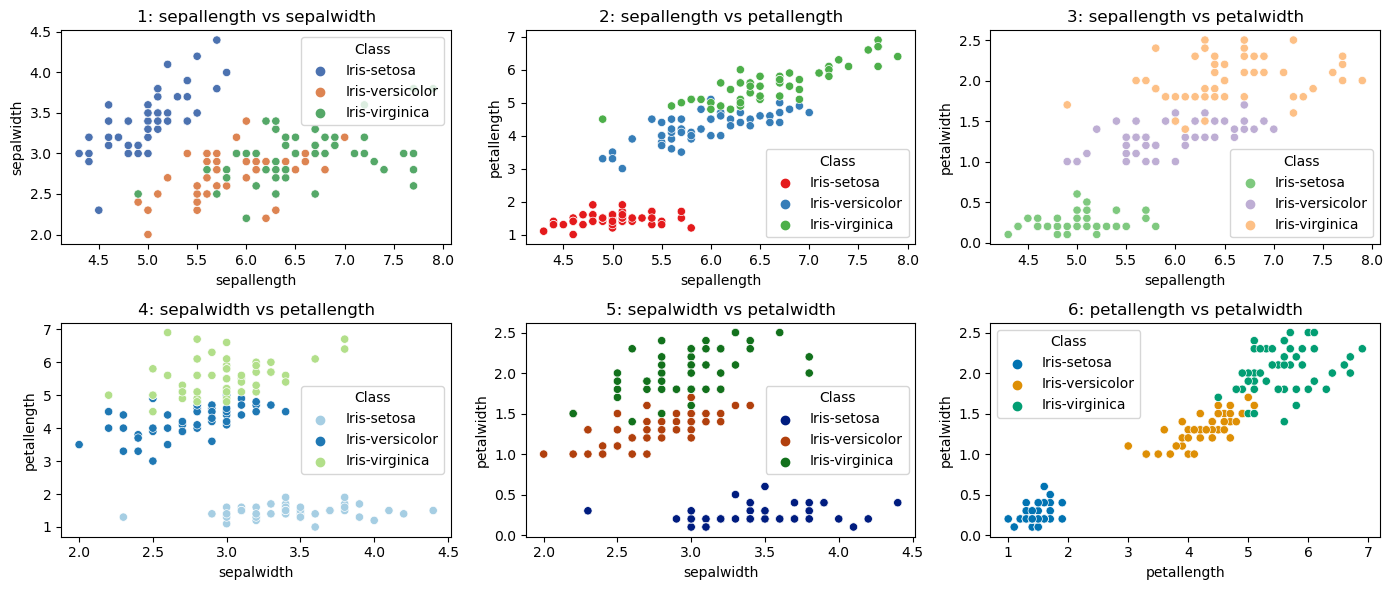

In [73]:
# Existem classes sobrepostas!!!

# Ver se existem classes sobrepostas -> considerar cada par de dados possível

color_types = ["deep", "Set1", "Accent", "Paired", "dark", "colorblind"]

# Define o tamanho da figura
plt.figure(figsize=(14, 6))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate([('sepallength', 'sepalwidth'), ('sepallength', 'petallength'),
                            ('sepallength', 'petalwidth'), ('sepalwidth', 'petallength'),
                            ('sepalwidth', 'petalwidth'), ('petallength', 'petalwidth')]):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X[x], y=X[y], hue=df_iris['Class'], palette=color_types[i])
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

Podemos observar que a maior parte dos gráficos evidencia uma **leve sobreposição** entre classes, pelo que, embora problemática, não aparenta ser drástica o suficiente para provocar equívocos significativos no processo de classificação.

A exceção a esta conclusão é o **gráfico 1**, que é um bom exemplo de classes **fortemente sobrepostas**. Podemos concluir que não seria possível classificar os valores target **1** e **2** de forma consistente se usássemos apenas os atributos `sepallength` e `sepalwidth`, visto que não existe uma separação clara entre as mesmas. Por outro lado, existem distinções claras entre classes para todos os outros pares de atributos analisados.

#### Presença de Outliers

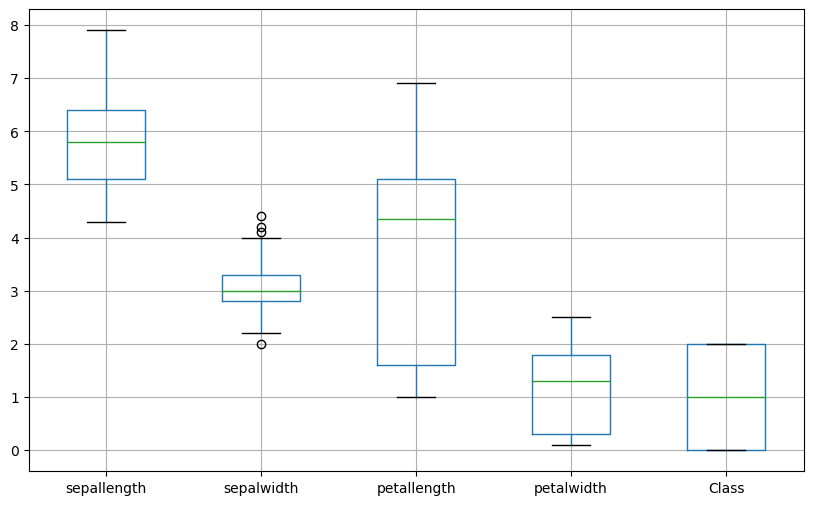

In [74]:
#Iris
df_iris_num.boxplot(figsize=(10, 6))
plt.show()

Podemos ver que a coluna **'sepalwidth'** tem alguns outliers, pelo que os vamos remover com a finalidade de aumentar a qualidade do nosso dataset:

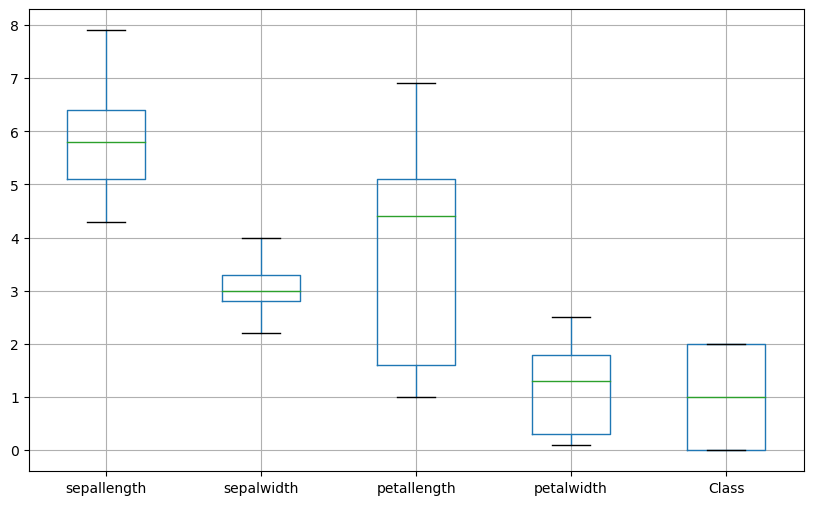

In [75]:
# Calcular o quartil 1 (Q1) e o quartil 3 (Q3) para a coluna problemática
Q1 = df_iris_num['sepalwidth'].quantile(0.25)
Q3 = df_iris_num['sepalwidth'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir os limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Criar uma flag para identificar outliers
df_iris_num = df_iris_num.loc[~((df_iris_num['sepalwidth'] < limite_inferior) | (df_iris_num['sepalwidth'] > limite_superior))]
df_iris_num.boxplot(figsize=(10, 6))
plt.show()

Outliers eliminados com sucesso!!!

#### Variáveis Irrelevantes ou Altamente Correlacionadas

Vamos repetir o processo anteriormente mencionado.

In [76]:
# convencionalmente -> 0.1
threshold = 0.1

selector = VarianceThreshold(threshold)
selector.fit(X)

# obter atributos com baixa variância
selected_features = selector.get_support(indices=True)
removed_features = [feature for feature in range(X.shape[1]) if feature not in selected_features]
print("Features que se podem remover devido à baixa variância:", removed_features)

Features que se podem remover devido à baixa variância: []


Seguindo a abordagem da baixa variância, não podemos descartar a hipótese de que existem atributos irrelevantes.

Não obstante, vamos passar à análise das **correlações** entre atributos para averiguar a relevância dos mesmos 

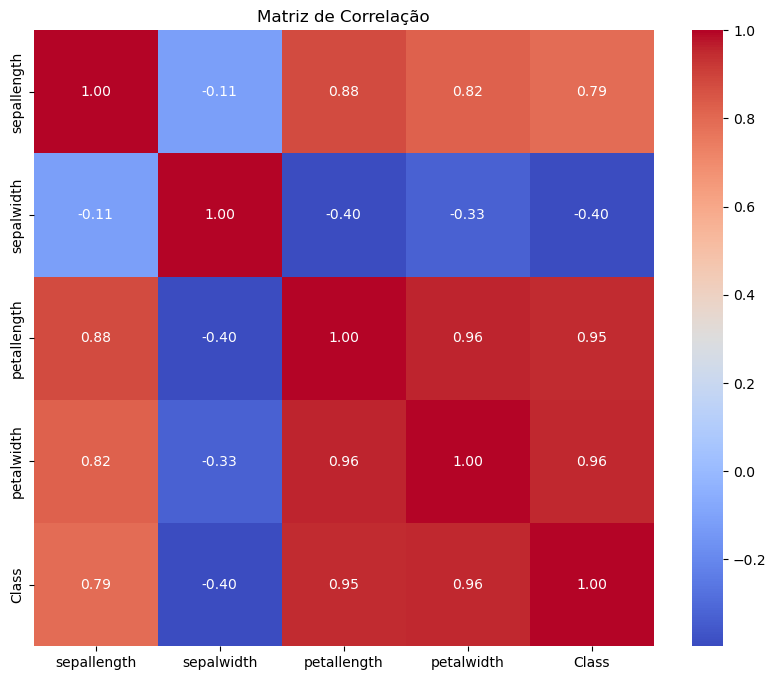

In [77]:
correlation_matrix = df_iris_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [78]:
correlation_matrix = df_iris_num.corr()
print(correlation_matrix)

print("\n - Correlação muito baixa: ")
is_corr(correlation_matrix,-0.15,0.15)

print("\n - Correlação muito alta: ")
is_corr(correlation_matrix,-0.85,0.85,False)

             sepallength  sepalwidth  petallength  petalwidth     Class
sepallength     1.000000   -0.113977     0.879374    0.822577  0.788053
sepalwidth     -0.113977    1.000000    -0.397123   -0.329782 -0.397265
petallength     0.879374   -0.397123     1.000000    0.961755  0.947469
petalwidth      0.822577   -0.329782     0.961755    1.000000  0.955549
Class           0.788053   -0.397265     0.947469    0.955549  1.000000

 - Correlação muito baixa: 
Correlação entre 'sepallength' e 'sepalwidth': -0.11397691243618663

 - Correlação muito alta: 
Correlação entre 'sepallength' e 'petallength': 0.8793741662010834
Correlação entre 'petallength' e 'petalwidth': 0.9617552047669646
Correlação entre 'petallength' e 'Class': 0.9474687951192345
Correlação entre 'petalwidth' e 'Class': 0.9555494596466296


#### Classes Desbalanceadas

In [79]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_iris_num['Class'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_iris_num['Class'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
2    50
1    49
0    47
Name: Class, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
2    34.246575
1    33.561644
0    32.191781
Name: Class, dtype: float64


Ou seja, apresentam uma distribuição de aproximadamente 34%, 33% e 32%, pelo que é explicito que a classe target está efetivamente **equilibrada**!

## Connect4 <a name = "connect4"></a>
[[voltar a Análise Datasets]](#datasets)

### 1. Análise Geral dos Dados

In [80]:
# Leitura do dataset 'connect4'
df_connect4 = pd.read_csv("connect4.csv")

In [81]:
# Visualização de parte do dataset
df_connect4.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win


In [82]:
df_connect4.dtypes

a1       object
a2       object
a3       object
a4       object
a5       object
a6       object
b1       object
b2       object
b3       object
b4       object
b5       object
b6       object
c1       object
c2       object
c3       object
c4       object
c5       object
c6       object
d1       object
d2       object
d3       object
d4       object
d5       object
d6       object
e1       object
e2       object
e3       object
e4       object
e5       object
e6       object
f1       object
f2       object
f3       object
f4       object
f5       object
f6       object
g1       object
g2       object
g3       object
g4       object
g5       object
g6       object
Class    object
dtype: object

Tendo em conta o tipo de dados deste dataset concluimos que são todos do tipo object.

Existem 42 features.

### 2. Missing Values

In [83]:
df_connect4.isnull().sum()

a1       0
a2       0
a3       0
a4       0
a5       0
a6       0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
d1       0
d2       0
d3       0
d4       0
d5       0
d6       0
e1       0
e2       0
e3       0
e4       0
e5       0
e6       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
g1       0
g2       0
g3       0
g4       0
g5       0
g6       0
Class    0
dtype: int64

Concluimos que não há valores em falta.

### 3. Análise de 'Class'

In [84]:
# Ver quantos valores distintos tem 'Class'
list_diff = df_connect4['Class'].unique()
print(list_diff)
print(len(list_diff))

['win' 'draw' 'loss']
3


Este dataset apenas tem 3 opções de classificação.

### 4. Análise dos Valores Nominais

In [85]:
# Ver quantos valores nominais existem que não sejam de 'Class'

colunas = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
          'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
          'g1', 'g2', 'g3', 'g4', 'g5', 'g6']

for col in colunas:
    print(col + ":")
    list_diff = df_connect4[col].unique()
    print(list_diff)
    print(len(list_diff))
    
    if col != colunas[-1]:
        print()

a1:
['b' 'o' 'x']
3

a2:
['b' 'o' 'x']
3

a3:
['b' 'o' 'x']
3

a4:
['b' 'o' 'x']
3

a5:
['b' 'o' 'x']
3

a6:
['b' 'o' 'x']
3

b1:
['b' 'o' 'x']
3

b2:
['b' 'o' 'x']
3

b3:
['b' 'o' 'x']
3

b4:
['b' 'o' 'x']
3

b5:
['b' 'o' 'x']
3

b6:
['b' 'o' 'x']
3

c1:
['x' 'o' 'b']
3

c2:
['o' 'b' 'x']
3

c3:
['b' 'o' 'x']
3

c4:
['b' 'o' 'x']
3

c5:
['b' 'o' 'x']
3

c6:
['b' 'o' 'x']
3

d1:
['x' 'o' 'b']
3

d2:
['o' 'x' 'b']
3

d3:
['x' 'o' 'b']
3

d4:
['o' 'x' 'b']
3

d5:
['x' 'o' 'b']
3

d6:
['o' 'x' 'b']
3

e1:
['b' 'o' 'x']
3

e2:
['b' 'o' 'x']
3

e3:
['b' 'o' 'x']
3

e4:
['b' 'o' 'x']
3

e5:
['b' 'o' 'x']
3

e6:
['b' 'o' 'x']
3

f1:
['b' 'o' 'x']
3

f2:
['b' 'o' 'x']
3

f3:
['b' 'o' 'x']
3

f4:
['b' 'o' 'x']
3

f5:
['b' 'o' 'x']
3

f6:
['b' 'o' 'x']
3

g1:
['b' 'o' 'x']
3

g2:
['b' 'o' 'x']
3

g3:
['b' 'o' 'x']
3

g4:
['b' 'o' 'x']
3

g5:
['b' 'o' 'x']
3

g6:
['b' 'o' 'x']
3


Concluimos que todos os atributos tem exatemente 3 valores distintos, sendo esses 'b', 'o', 'x', em todos eles.

### 5. Remoção ou Substituição de Dados

Neste dataset não há nenhum atributo que não seja necessário ou que possa ser removido, uma vez que representa um tabuleiro de jogo, logo todas as peças são importantes.

### 6. Complicações nos datasets

Após analisarmos o dataset sabemos que este não possui missing values e que a dimensionalidade é muito elevada tendo em conta que apresenta 42 features.

Tal como foi feito até agora, de modo a poder analisar mais aprofundadamente o dataset, iremos transformar todos os valores em inteiros. De notar que iremos fazer uma cópia do estado atual do dataset, pois esta mudança apenas será utilizada para a visualização dos dados e não para a sua testagem na DecisionTree por nós criada.

In [86]:
# Cópia do dataset atual onde iremos fazer a alteração dos dados para visualização
df_connect4_num = df_connect4.copy()

In [87]:
# Mudar todos os dados para valores numéricos:
colunas = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
          'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
          'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'Class']

for col in colunas:
    list_diff = df_connect4_num[col].unique()
    subs = {}
    for i in range(len(list_diff)):
        subs[list_diff[i]] = i
    df_connect4_num[col] = df_connect4_num[col].map(subs)

Vamos apenas confirmar se as alterações foram realizadas corretamente.

In [88]:
print(df_connect4_num)

       a1  a2  a3  a4  a5  a6  b1  b2  b3  b4  ...  f4  f5  f6  g1  g2  g3  \
0       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2       0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
67552   2   2   0   0   0   0   1   2   1   0  ...   0   0   0   1   1   2   
67553   2   2   0   0   0   0   1   0   0   0  ...   0   0   0   1   2   1   
67554   2   2   0   0   0   0   1   1   0   0  ...   0   0   0   1   2   2   
67555   2   1   0   0   0   0   1   0   0   0  ...   0   0   0   1   2   1   
67556   2   1   1   1   2   0   1   0   0   0  ...   0   0   0   2   0   0   

       g4  g5  g6  Class  
0       0   0   0      0  
1       0

Concluimos que sim.

Para efeitos de simplicação na visualização dos graficos dividimos o dataset em duas partes:

In [89]:
# Definir atributos e target
X = df_connect4_num[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 
                     'c5', 'c6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'f1', 'f2', 
                     'f3', 'f4', 'f5', 'f6', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6']]
y = df_connect4_num['Class']

#### Classes Sobrepostas

Sabemos que para ver se o dataset tem classes sobrepostas ou não, será necessário criar uma enorme quantidade de scatterplots, tal deve-se ao facto de este apresentar um número elevado de atributos.

De modo a facilitar a criação de todos os conjuntos possiveis de 2 classes iremos utilizar a biblioteca itertools:

In [90]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
atributos = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
          'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
          'g1', 'g2', 'g3', 'g4', 'g5', 'g6']

combinacoes = list(itertools.combinations(atributos, 2))

In [91]:
len(combinacoes)

861

Para analisarmos se este dataset tem ou não classes sobrepostas seriam necessários 861 scatterplots. Tendo em conta o elavado número de gráficos que seriam necessários gerar, não o iremos fazer, mas será de esperar que algumas classes se sobreponham.

#### Presença de Outliers

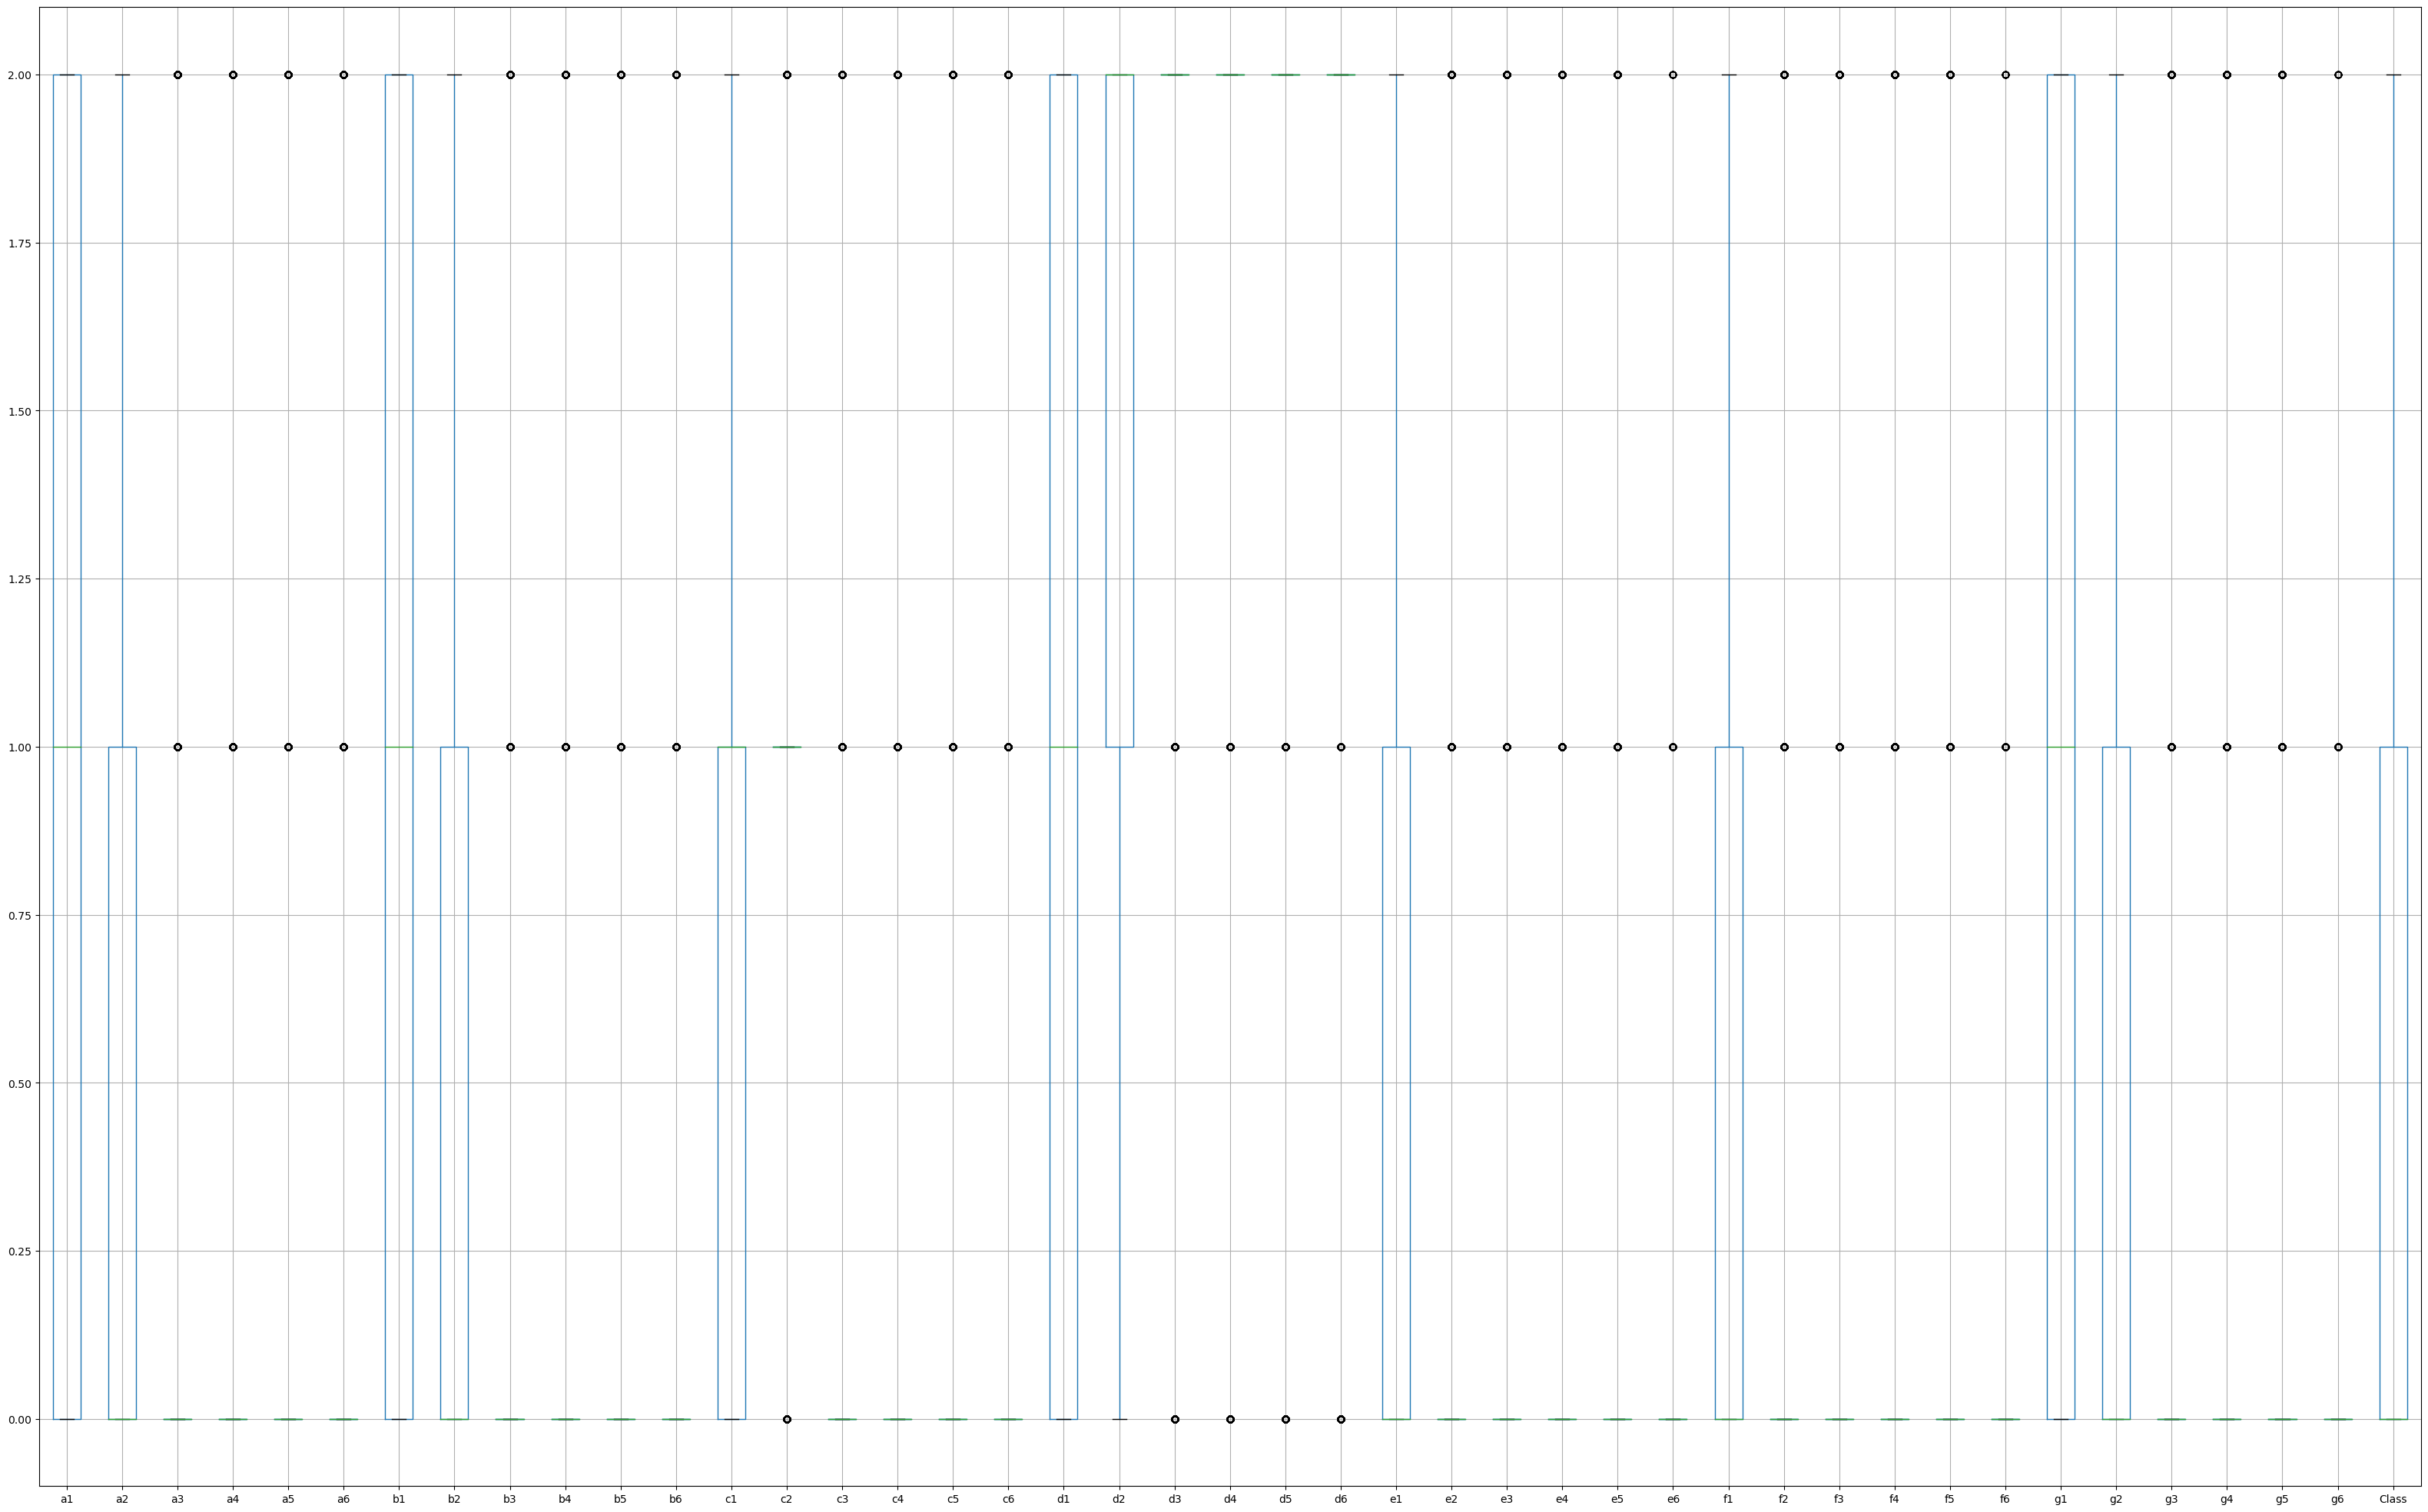

In [92]:
#Connect4
df_connect4_num.boxplot(figsize=(40, 25))
plt.show()

In [93]:
colunas_com_outliers = []
for coluna in df_connect4_num.select_dtypes(include=[float, int]).columns:
    limite_inferior = df_connect4_num[coluna].quantile(0.25) - 1.5 * (df_connect4_num[coluna].quantile(0.75) - df_connect4_num[coluna].quantile(0.25))
    limite_superior = df_connect4_num[coluna].quantile(0.75) + 1.5 * (df_connect4_num[coluna].quantile(0.75) - df_connect4_num[coluna].quantile(0.25))
    if df_connect4_num[(df_connect4_num[coluna] < limite_inferior) | (df_connect4_num[coluna] > limite_superior)].shape[0] > 0:
        colunas_com_outliers.append(coluna)

# Imprimindo as colunas que possuem outliers
print("Colunas com outliers:", colunas_com_outliers)


Colunas com outliers: ['a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'c2', 'c3', 'c4', 'c5', 'c6', 'd3', 'd4', 'd5', 'd6', 'e2', 'e3', 'e4', 'e5', 'e6', 'f2', 'f3', 'f4', 'f5', 'f6', 'g3', 'g4', 'g5', 'g6']


Concluimos que existem outliers em quase todos os atributos. No entanto não faz sentido removê-los pois este dataset representa um tabuleiro e todas as posições são importantes.

#### Variáveis Irrelevantes ou Altamente Correlacionadas

Iremos seguir o procedimento que foi utilizado nos restantes datasets e começamos por detetar Variáveis Irrelevantes:

In [94]:
# convencionalmente -> 0.1
threshold = 0.1

selector = VarianceThreshold(threshold)
selector.fit(X)

# obter atributos com baixa variância
selected_features = selector.get_support(indices = True)
removed_features = [feature for feature in range(X.shape[1]) if feature not in selected_features]
print("Features que se podem remover devido à baixa variância:", removed_features)

Features que se podem remover devido à baixa variância: [4, 5, 10, 11, 16, 17, 22, 23, 27, 28, 29, 33, 34, 35, 40, 41]


Apesar de algumas colunas terem sido consideradas irrelevantes, não iremos fazer a sua eliminação, pois como já foi mencionado previamente, este dataset diz respeito a um tabuleiro de jogo, logo precisamos de saber o que cada posição tem.

Passamos à análise das **correlações** entre atributos para avaliar a relevância dos mesmos:

Iremos primeiro criar uma matriz de correlação para que possamos visualizar a correlação dos dados:

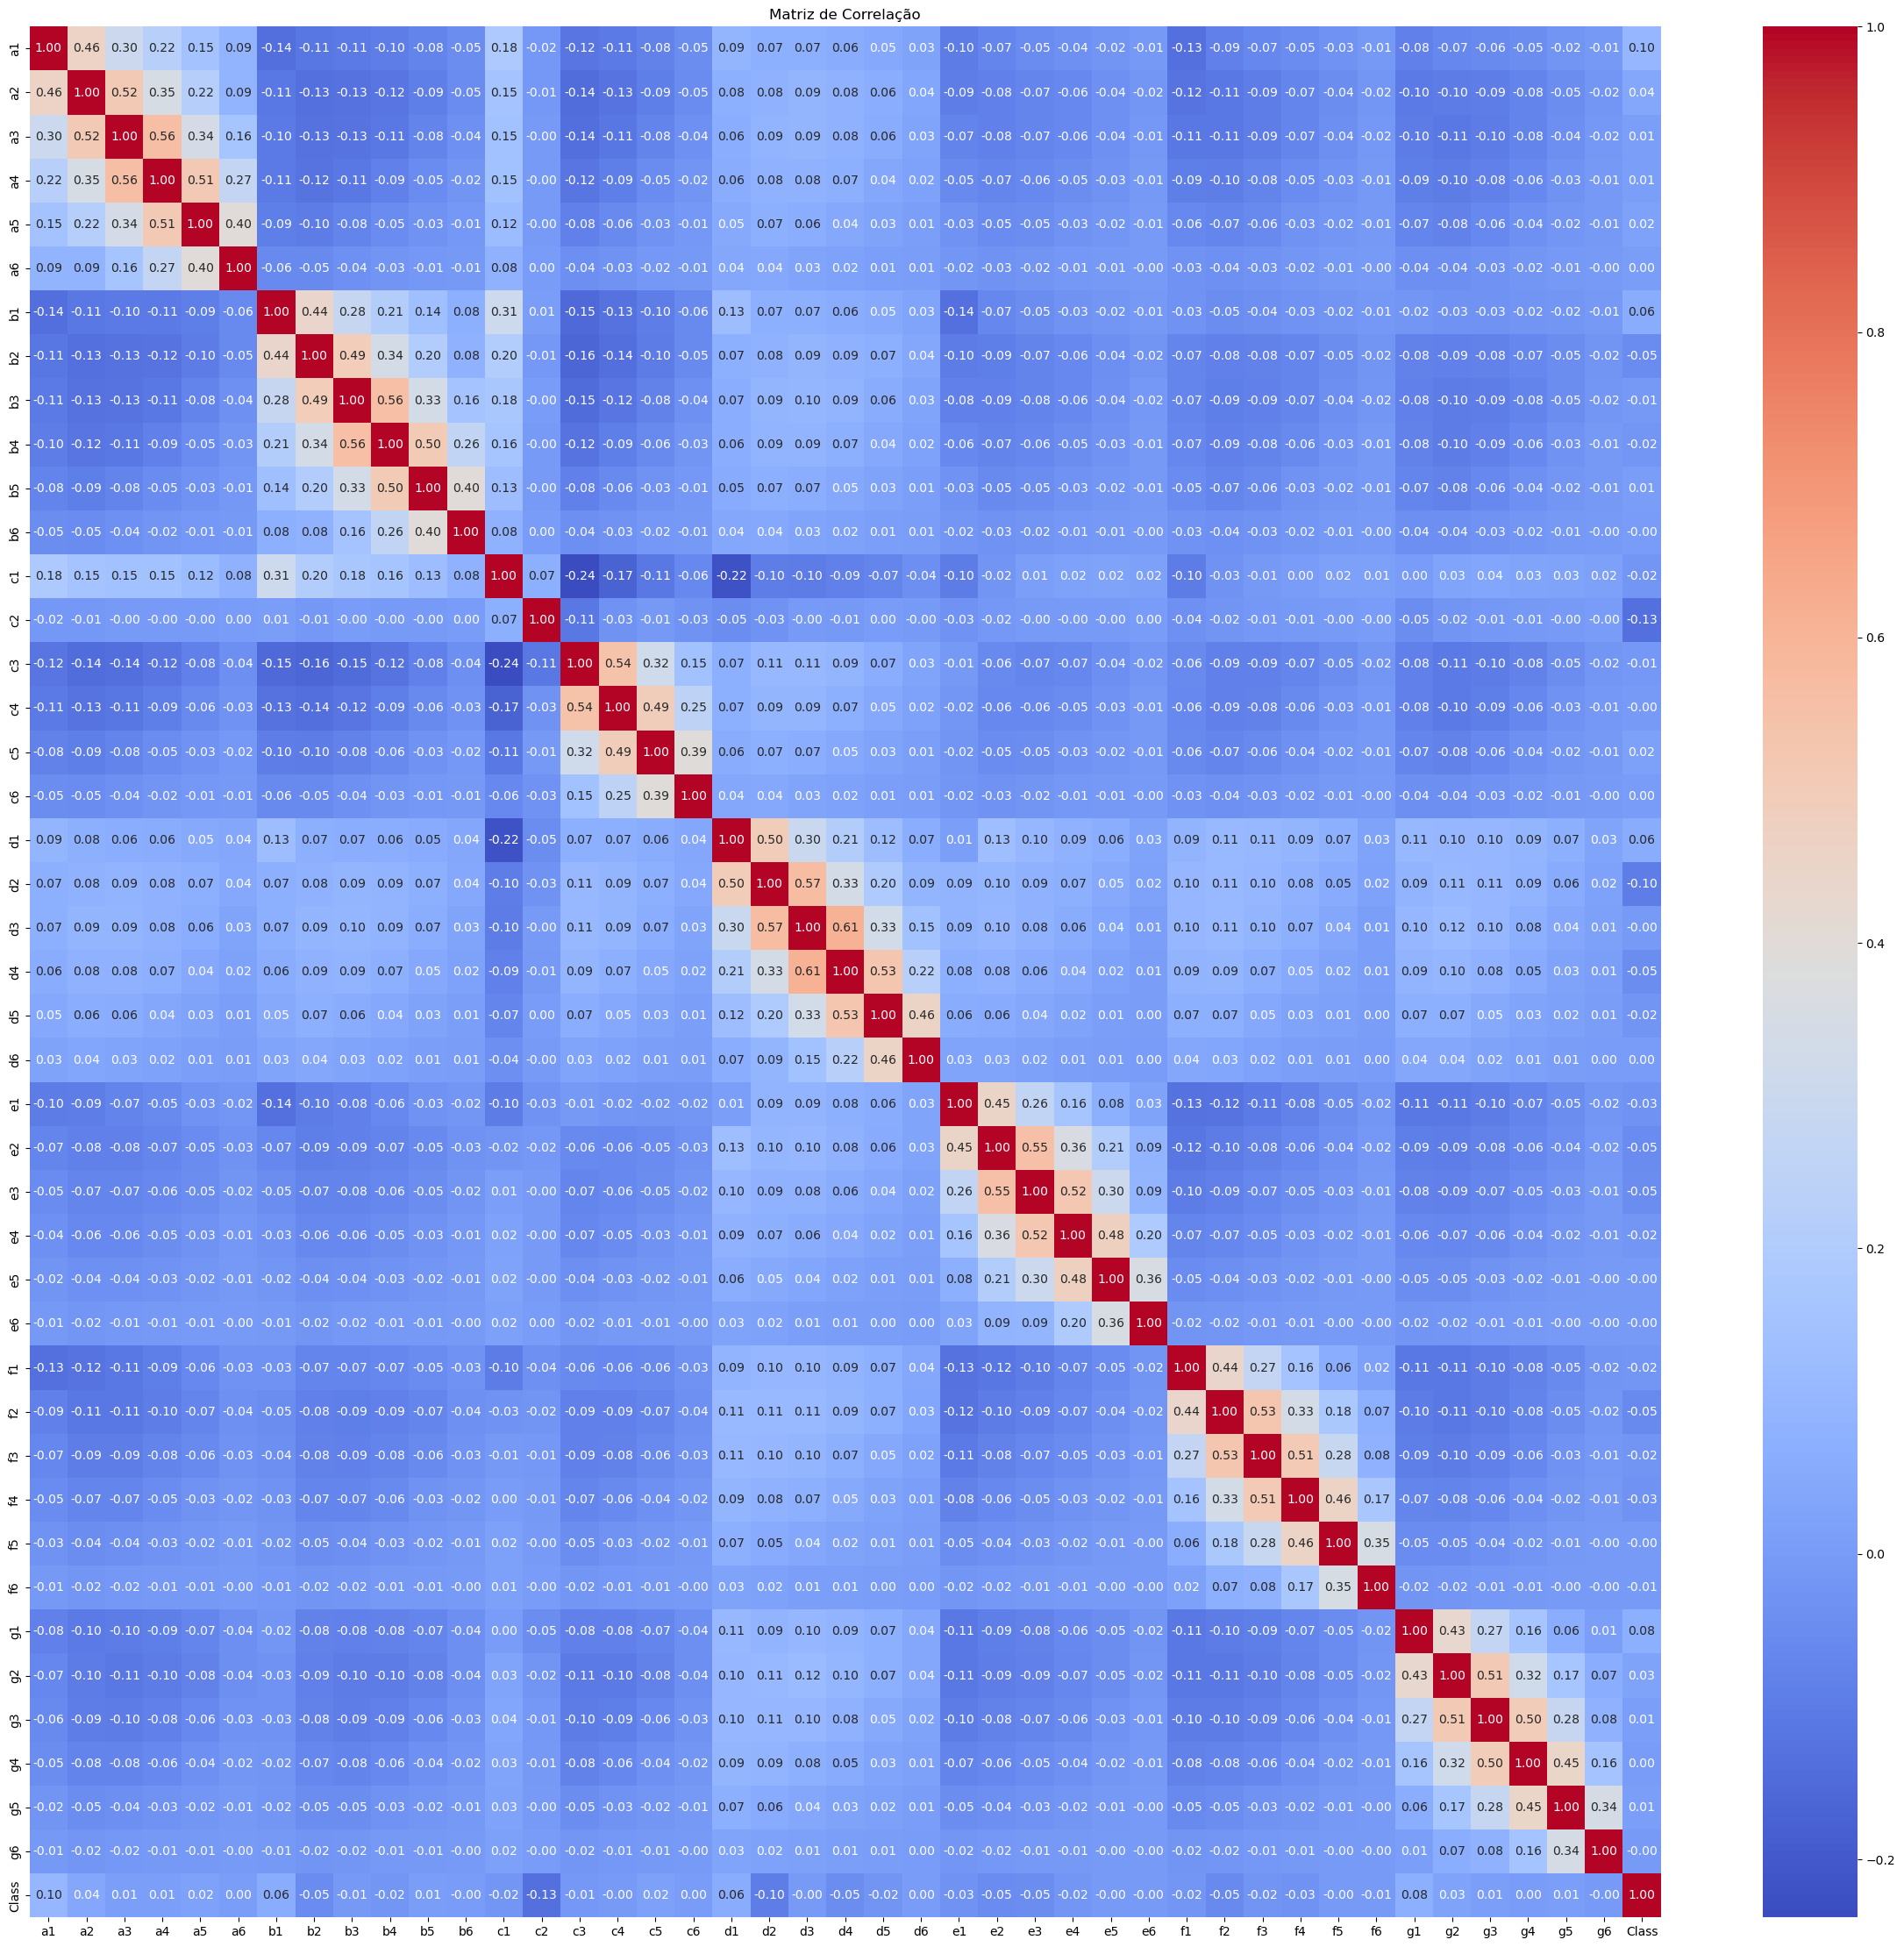

In [95]:
correlation_matrix = df_connect4_num.corr()

plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Usamos agora a função desenvolvida anteriormente para tirarmos conclusões:

In [96]:
correlation_matrix = df_connect4_num.corr()
print(correlation_matrix)

print("\n - Correlação muito baixa: ")
is_corr(correlation_matrix,-0.15,0.15)

print("\n - Correlação muito alta: ")
is_corr(correlation_matrix,-0.85,0.85,False)

             a1        a2        a3        a4        a5        a6        b1  \
a1     1.000000  0.459998  0.301285  0.223808  0.151142  0.086273 -0.141276   
a2     0.459998  1.000000  0.515238  0.349997  0.218708  0.089650 -0.109396   
a3     0.301285  0.515238  1.000000  0.560939  0.342263  0.161670 -0.103536   
a4     0.223808  0.349997  0.560939  1.000000  0.512233  0.270981 -0.105565   
a5     0.151142  0.218708  0.342263  0.512233  1.000000  0.397394 -0.090484   
a6     0.086273  0.089650  0.161670  0.270981  0.397394  1.000000 -0.058684   
b1    -0.141276 -0.109396 -0.103536 -0.105565 -0.090484 -0.058684  1.000000   
b2    -0.114446 -0.132141 -0.131537 -0.122788 -0.098379 -0.054856  0.439733   
b3    -0.105077 -0.128805 -0.126794 -0.109446 -0.078147 -0.038198  0.283091   
b4    -0.097529 -0.118144 -0.108505 -0.085023 -0.053862 -0.025134  0.207661   
b5    -0.077565 -0.091414 -0.075383 -0.052610 -0.031883 -0.014878  0.135280   
b6    -0.049320 -0.050776 -0.036407 -0.024191 -0.014

Concluimos que nenhum atributo tem correlação alta com outro.

#### Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'Class', possui ou não uma distribuição equilibrada de valores:

In [97]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_connect4['Class'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_connect4['Class'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
win     44473
loss    16635
draw     6449
Name: Class, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
win     65.830336
loss    24.623651
draw     9.546013
Name: Class, dtype: float64


Concluimos que 'Class' **não está equilibrada**.

# DecisionTreeClassifier <a name = "dtc"></a>
[[voltar ao Indice]](#indice)

Após termos analisado detalhadamente cada dataset passamos agora para a criação do nosso DecisionTreeClassifier.

## Generalização <a name = "dtc_gen"></a>
[[voltar a DecisionTreeClassifier]](#dtc)

Começamos por criar um DecisionTreeClassifier generalizado, isto é, que funciona de acordo com o Capítulo 19 do livro "Artificial Intelligence: a Modern Approach, by Peter Norvig and Stuart Russell (4th edition)". Neste código apenas é utilizada a biblioteca numpy e random.

Na porção de código que se encontra abaixo temos a nossa versão do código, sendo que esta funciona de acordo com o ID3 da imagem 19.5 do livro, contendo portanto as funções 'learn_decision_tree', 'plurality_value' e 'importance', juntamente com um diverso conjunto de funções auxiliares que permitem o seu funcionamento.

Para além disso foi implementada a função 'show_tree' que permite dar print à árvore de decisão criada nos modelos que o enunciado pede. Foi também desenvolvida a função 'predict' que nos permite prever qual a classificação de um determinado exemplo a partir da árvore de decisão criada. Por fim, temos também a função 'accuracy' que calcula a percentagem de sucesso do algoritmo.

[[skip código]](#skip_1)

In [98]:
class Node:

    def __init__(self, attribute = None, label = None, counter = None):
        self.attribute = attribute  # atributo usado para fazer a divisão neste nó
        self.label = label  # guarda o rótulo da classe se o nó for um folha
        self.children = {}  # dicionário de filhos {valor do atributo: nó filho}
        self.counter = counter # Vai guardar o número de exemplos do dataset que o ramo contém

    def add_children(self, value, node):
        self.children[value] = node

    def is_leaf(self):
        return self.label is not None

# Esta classe vai ter funções semelhantes ao DecisionTreeClassifier do scikit-learn
class DecisionTree:

    # Função que inicializa as características da árvore, ou seja, os critérios de paragem
    def __init__(self, max_depth = 100, min_samples_split = 2):
        self.max_depth = max_depth  # profundidade máxima que a árvore pode atingir
        self. min_samples_split = min_samples_split # número mínimo de amostras necessárias para dividir um nó interno
        self.root = None    # Vai guardar a raiz da árvore que for criada
        self.unique_values = None  # guarda todos os valores unicos de cada atributo originalmente dados {}
        self.all_data = None

    # ------------------ Secção que contém o conjunto de funções para a criação da árvore de decisão ------------------

    # função que é chamada pelo utilizador para treinar a árvore
    def fit(self, data):
        attributes = data.columns[:-1]  # ir buscar os nomes das colunas, exceto o do target
        self.unique_values = {attribute: data[attribute].unique() for attribute in attributes}
        self.all_data = data # cópia dos dados originais
        self.root = self.learn_decision_tree(data, attributes)

    
    # esta função funciona de acordo com a que é dada no livro
    # examples - dados de treino
    # attributes - conjunto de atributos que podem ser testados (nomes das features)
    # parent_examples - exemplos do nó pai, usado para determinar a classificação quando examples está vazio.
    def learn_decision_tree(self, examples, attributes, parent_examples = None, depth = 0):
        # Começamos por testar condições de paragem:
        if depth >= self.max_depth or len(examples) < self.min_samples_split:
            return Node(label=self.plurality_value(examples), counter = len(examples))
        
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset

        # Caso não haja mais examples
        if examples.empty:
            return Node(label = self.plurality_value(parent_examples), counter = len(parent_examples))
        # Caso os examples tenham todos a mesma classificação
        elif len(examples[class_column].unique()) == 1:
            return Node(label = examples[class_column].iloc[0], counter = len(examples))
        # Caso não haja mais atributos a testar
        elif len(attributes) == 0:
            return Node(label = self.plurality_value(examples), counter = len(examples))
        # Em qualquer outro caso continuamos a dividir a árvore
        else:
            a = self.importance(attributes, examples)   # melhor atributo
            if a is None:
                return Node(label = self.plurality_value(examples), counter = len(examples))
            root = Node(attribute = a, counter = len(examples))
            values_of_A = examples[a].unique()
            for v in self.unique_values[a]:
                if v in values_of_A:
                    exs = examples[examples[a] == v].drop(columns = [a])    # removemos a coluna do atributo porque esse atributo já foi avaliado
                    subtree = self.learn_decision_tree(exs, attributes.drop(a), examples, depth + 1)
                    root.add_children(v, subtree)
                else:
                    exs = self.all_data[self.all_data[a] == v]
                    end_node = Node(label = self.plurality_value(exs), counter = 0)
                    root.add_children(v, end_node)
            return root


    # esta função retorna a classificação mais comum no conjunto de exemplos
    def plurality_value(self, examples):
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset
        most_comun = examples[class_column].mode()
        # Caso haja classificações com o mesmo número de ocorrencias escolhe-se uma qualquer
        return random.choice(most_comun)
    

    # função que determina qual o atributo mais importante
    def importance(self, attributes, examples):
        best_atrribute = None
        best_gain = -1
        for a in attributes:
            gain = self.information_gain(examples, a)
            if gain > best_gain:
                best_gain = gain
                best_atrribute = a
        return best_atrribute


    # esta função é usada para perceber se é vantajoso usar um determinado atributo para a divisão ou não
    def information_gain(self, examples, atrribute):
        # Calculamos a entropia antes da divisão dos dados
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset
        before = self.entropy(examples[class_column])   # guardamos o valor da entropia antes da divisão

        # Calculamos a entropia média após a 'divisão' usando o atributo
        unique_values = examples[atrribute].unique()
        after = 0   # aqui vamos guardar o valor da entropia depois da 'divisão'
        for value in unique_values:
            exs = examples[examples[atrribute] == value]    # vamos buscar apenas os exemplos em que na coluna 'atrribute' tem valor igual a 'value'
            after += (len(exs) / len(examples)) * self.entropy(exs[class_column])

        # Devolvemos o 'ganho' de informação
        return before - after
    

    # função usada para calcular a entropia de um conjunto de dados
    def entropy(self, classification):
        _, counts = np.unique(classification, return_counts = True)   # devolve duas listas, a primeira tem as designações das classificações e a segunda as quantidades
        prob = counts / len(classification)
        entropy = -np.sum(prob * np.log2(prob))
        return entropy
    

    # ------------------ Secção que permite dar print à árvore de decisão ------------------
    
    def show_tree(self):
        self.print_node(self.root)

    def print_node(self, node, tab = ""):
        if node.is_leaf():
            return
        
        print(tab + "<Attribute: " + node.attribute + ">")
        for value, child_node in node.children.items():
            if child_node.is_leaf():
                print(tab, "     ", "Value: ", value, " - ", "Class: ", child_node.label, "  (", child_node.counter, ")")
            else:
                print(tab, "     ", "Value: ", value)
            self.print_node(child_node, tab + "          ")


    # ------------------ Secção que permite dar predict de uma classificação através árvore de decisão ------------------

    def predict(self, examples):
        predictions = []
        for _, example in examples.iterrows():
            node = self.root
            while node.children:
                # Vemos qual é o atributo a ser avaliado nesse node e procuramos o valor do exemplo:
                value = example[node.attribute]
                # Caso o valor que recebemos faça parte de uma das divisões que fizemos, continuamos a seguir a árvore por esse caminho:
                if value in node.children:
                    node = node.children[value]
                # Caso não haja um nó filho com esse valor usamos os dados para ver qual é o valor mais provável:
                else:
                    predictions.append(self.plurality_value(examples))
                    break
            else:
                # Se a função não deu break é porque chegamos a uma folha, agora só temos de ver qual é a classificação
                predictions.append(node.label)
        return predictions
    

    # ------------------ Secção que permite classificar a accuracy através árvore de decisão ------------------

    def accuracy(self, examples):
        correct_predictions = 0
        total_predictions = len(examples)

        # Faz previsões para cada exemplo e verifica se está correta
        predicted_labels = self.predict(examples)
        true_labels = examples[examples.columns[-1]].tolist()

        for pred, true in zip(predicted_labels, true_labels):
            if pred == true:
                correct_predictions += 1

        # Calcula a precisão
        accuracy = correct_predictions / total_predictions
        return accuracy

**fim de skip** <a name = "skip_1"></a>

## Restaurant <a name = "dtc_rest"></a>
[[voltar a DecisionTreeClassifier]](#dtc)

Após analisarmos detalhadamente o dataset 'Restaurant', concluimos que o mesmo não apresenta qualquer tipo de problema específico, por este motivo, será de esperar que o código do DecisionTree desenvolvido em [Generalização](#dtc_gen) seja capaz de gerar uma árvore de decisão.

### Árvore de Decisão <a name = "ad_rest"></a>
[[voltar a Restaurant]](#dtc_rest)

Uma vez que a leitura do dataset já foi realizada em [Restaurant](#restaurant) passamos para a criação da árvore de decisão. Numa primeira fase iremos usar todo o dataset para ver qual a árvore que melhor se ajusta a estes dados.

In [99]:
tree_restaurant = DecisionTree()

In [100]:
tree_restaurant.fit(df_rest)

In [101]:
tree_restaurant.show_tree()

<Attribute: Pat>
       Value:  Some  -  Class:  Yes   ( 4 )
       Value:  Full
          <Attribute: Hun>
                 Value:  Yes
                    <Attribute: Type>
                           Value:  French  -  Class:  No   ( 0 )
                           Value:  Thai
                              <Attribute: Fri>
                                     Value:  No  -  Class:  No   ( 1 )
                                     Value:  Yes  -  Class:  Yes   ( 1 )
                           Value:  Burger  -  Class:  Yes   ( 1 )
                           Value:  Italian  -  Class:  No   ( 1 )
                 Value:  No  -  Class:  No   ( 2 )
       Value:  None  -  Class:  No   ( 2 )


### Testes <a name = "test_rest"></a>
[[voltar a Restaurant]](#dtc_rest)

Como sabemos a árvore de decisão varia consoante os dados que lhe são disponibilizados. Tendo isto em conta vamos fazer uma divisão dos dados e usar apenas uma porção dos mesmos para treinar a árvore. Aproveitamos para ver como funcionam as funções 'accuracy' e 'predict' implementadas. 

De modo a comprovar que dados diferentes geram árvores diferentes e accuracies diferentes, iremos usar seeds aleatórias, neste caso escolhemos 19 e 42, mantendo uma proporção de dados de 70/30.

#### TESTE 1:

In [102]:
train_df, test_df = train_test_split(df_rest, test_size=0.3, random_state = 19)

In [103]:
train_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
10,No,No,No,No,None,$,No,No,Thai,0-10,No
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes


In [104]:
test_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
11,Yes,Yes,Yes,Yes,Full,$,No,No,Burger,30-60,Yes


In [105]:
tree = DecisionTree()

In [106]:
tree.fit(train_df)

In [107]:
tree.show_tree()

<Attribute: Pat>
       Value:  Some  -  Class:  Yes   ( 3 )
       Value:  None  -  Class:  No   ( 2 )
       Value:  Full
          <Attribute: Hun>
                 Value:  Yes  -  Class:  Yes   ( 1 )
                 Value:  No  -  Class:  No   ( 2 )


In [108]:
predictions = tree.predict(test_df)
print(predictions)

['Yes', 'Yes', 'Yes', 'Yes']


In [109]:
accuracy = ac(predictions, test_df.iloc[:,-1])
print(accuracy)

0.5


#### TESTE 2:

In [110]:
train_df, test_df = train_test_split(df_rest, test_size=0.3, random_state = 42)

In [111]:
train_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
11,Yes,Yes,Yes,Yes,Full,$,No,No,Burger,30-60,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No


In [112]:
test_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
10,No,No,No,No,None,$,No,No,Thai,0-10,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No


In [113]:
tree = DecisionTree()

In [114]:
tree.fit(train_df)

In [115]:
tree.show_tree()

<Attribute: Pat>
       Value:  Some  -  Class:  Yes   ( 3 )
       Value:  Full
          <Attribute: Type>
                 Value:  Italian  -  Class:  Yes   ( 0 )
                 Value:  Burger  -  Class:  Yes   ( 1 )
                 Value:  Thai
                    <Attribute: Fri>
                           Value:  No  -  Class:  No   ( 1 )
                           Value:  Yes  -  Class:  Yes   ( 1 )
                 Value:  French  -  Class:  No   ( 1 )
       Value:  None  -  Class:  No   ( 1 )


In [116]:
predictions = tree.predict(test_df)
print(predictions)

['No', 'Yes', 'Yes', 'Yes']


In [117]:
accuracy = ac(predictions, test_df.iloc[:,-1])
print(accuracy)

0.5


## Weather <a name = "dtc_weather"></a>
[[voltar a DecisionTreeClassifier]](#dtc)

Ao analisarmos o dataset 'Weather', concluímos que estávamos diante de um problema de desequilíbrio de classes. Percebemos que a distribuição entre as classes 'yes' e 'no' não era equitativa, o que poderia levar a uma tendência nos resultados da classificação. Para mitigar esse desequilíbrio e promover uma modelagem mais justa e representativa das classes, decidimos implementar a técnica SMOTE.

Para além disso, concluimos também que nos deparávamos com um problema de valores contínuos. Apesar de neste dataset em específico não nos serem dados muitos exemplos, conseguimos perceber que as variáveis das colunas 'Temp' e 'Humidity' poderiam assumir uma infinidade de valores. Por este motivo, de modo a evitar que a árvore gerasse um nó para cada valor distinto de uma dessas colunas, decidimos implementar o Binning.

#### **Binning** 

Ao aplicar **Equal-Width Binning**, separamos os valores contínuos em vários intervalos com o mesmo tamanho, sendo estes desigandos de 'bins' ou 'caixas'. Este processo é aplicado para **evitar overfitting** e produzir árvores de decisão mais simples, através da redução do número de potenciais divisões que um algoritmo poderia considerar. Por exemplo, em vez de fazer 3 divisões para valores muito próximos, como 5.31, 5.311 e 5.3111, divide apenas uma vez.

Neste tipo de binning, para generalizar o tamanho que cada bin deve ter, devemos primeiro escolher em quantos intervalos os exemplos serão divididos:
 - width = (max-min)/bins

Para escolher o número de intervalos, podemos basear-nos na **heurística regra da raiz quadrada**, em que assumimos que o número de bins corresponde, aproximadamente, à raiz quadrada do número de observações.

Com a finalidade de implementar este método, introduzimos funções auxiliares capazes de detetar, de uma forma generalizada, a presença de valores contínuos tanto para inteiros, que é o caso neste dataset, como para floats, que seria um problema com o qual nos depararíamos no dataset 'Iris'.


Segue em abaixo a adaptação do código DecisionTree com as funções auxiliares no fim do código e as devidas alterações.

**SMOTE**

O **Synthetic Minority Over-sampling Technique** (SMOTE) é uma técnica de pré-processamento de dados que tem como objetivo abordar o problema de desequilíbrio de classes. O processo envolve selecionar exemplos da classe minoritária e criar novos exemplos combinando-os com outros exemplos próximos no espaço das características.

1. Identificar a Classe Minoritária: Inicialmente, identifica-se a classe com menos exemplos no conjunto de dados.
2. Selecionar Exemplos para Combinação: Exemplos dessa classe minoritária são escolhidos aleatoriamente.
3. Encontrar Vizinhos Próximos: Para cada exemplo selecionado, localizam-se os k vizinhos mais próximos (também da classe minoritária).
4. Gerar Novos Exemplos: Para cada vizinho selecionado, cria-se um novo exemplo combinando o exemplo original com o vizinho utilizando uma combinação linear ponderada com um coeficiente aleatório.
 
Para este efeito, foi implementada a função apply_smote para resolver o problema de classes desbalanceadas, juntamente com as funções auxiliares necessárias para a escolha e interpolação de exemplos.

Destacamos que a utilização de SMOTE está pré-definida para ser realizada caso sejam encontradas classes desbalanceadas, no entanto, se por algum motivo não se desejar realizar esta ação é possivel fazendo: tree.fit(balance = False).

**Limite de decisão para classes desbalanceadas (ainda em SMOTE)**

Com a finalidade de identificar a presença de **classes desbalanceadas** de forma generalizada, decidimos implementar um pequeno excerto de código que deteta proporções de dados da coluna target de qualquer dataset. Desta forma, somos capazes de identificar desequilíbrios mesmo que os valores das classes sejam **nominais ou que existam mais do que 2 valores distintos** na coluna target:

 - Inicialmente, obtemos o número de instâncias das classes maioritária e minoritária;

 - Criámos um valor limite, definido como **balance_threshold**, tendo sido a escolha do seu valor decidida tendo em conta que consideramos desbalanceado todo o dataset que passa em pelo menos 3% a diferença de proporção **60% / 40%** relativamente às classes maioritária e minoritária:
    
           - Se (n_minoritária / n_maioritária) < balance_threshold -> está desbalanceada!

 - De maneira a que este diagnóstico fosse geral (se o dataset possuir vários valores diferentes na coluna target, seria dificil analisar todos os pares de combinações possíveis), definimos que uma classe é desbalanceada se a classe maioritária for, pelo menos, **0.6 vezes** maior do que a classe minoritária;


Para elaborar um pouco a escolha do balance_threshold referido, realizámos vários testes de proporção e chegámos à conclusão que:

 - proporção classe minoritária: 40 em 100

 - proporção classe maioritária: 60 em 100

 - cálculo de valor limite: 40 / 60 ~ 0.667


E, alterando um pouco os valores para aquilo que consideramos ser desbalanceado:

 - proporção classe minoritária: 37 em 100

 - proporção classe maioritária: 63 em 100

 - cálculo de valor limite: 37 / 63 ~ 0.587


Logicamente, se houver mais que 2 valores:

 - proporção classe minoritária: 23 em 100

 - proporção classe maioritária: 50 em 100

 - proporção classe restante: 27 em 100

 - cálculo de valor limite: 23 / 50 = 0.460

Pelo que podemos concluir que é **uma constante bem definida e que cumpre corretamente o seu propósito**:

 - (n_minoritária / n_maioritária) < 0.6 deteta corretamente **classes desbalanceadas**


[[skip código]](#skip_2)

In [118]:
class Node:

    def __init__(self, attribute = None, label = None, counter = None, label_counter = None):
        self.attribute = attribute  # atributo usado para fazer a divisão neste nó
        self.label = label  # guarda o rótulo da classe se o nó for um folha
        self.children = {}  # dicionário de filhos {valor do atributo: nó filho}
        self.counter = counter # Vai guardar o número de exemplos do dataset que o ramo contém

    def add_children(self, value, node):
        self.children[value] = node

    def is_leaf(self):
        return self.label is not None



class DecisionTree:

    # Função que inicializa as características da árvore, ou seja, os critérios de paragem
    def __init__(self, max_depth = 100, min_samples_split = 2, unique_threshold = 7):
        self.max_depth = max_depth  
        self. min_samples_split = min_samples_split 
        self.root = None
        self.unique_values = None
        self.all_data = None
        self.unique_threshold = unique_threshold  # guarda o valor mínimo de valores distintos que tem de haver para haver binning
        self.bin_cols = [] # guarda os índices das colunas com 'int' e 'float' (usado em binning)
        self.eqbinlist = [] # guarda os valores dos intervalos (usado em binning), é uma lista com listas de tuplos, cada sublista é uma coluna
        self.dict_smote = {}  # Dicionário para armazenar os mapeamentos de codificação numérica para string
    
    # ------------------ Secção que contém o conjunto de funções para a criação da árvore de decisão ------------------
        

     
    def fit(self, original_data, balance = True):
            attributes = original_data.columns[:-1]
            data = original_data.copy()
            
            # Vê se precisa de SMOTE
            if balance:
                # Processa os dados (normalização e codificação)
                processed_data = self.preprocess_data(data)
                class_counts = processed_data[processed_data.columns[-1]].value_counts()
                min_class_count = class_counts.min()
                max_class_count = class_counts.max()
                balance_threshold = 0.6
                is_imbalanced = (min_class_count / max_class_count) < balance_threshold

                # Aplica SMOTE se está desbalanceado
                if is_imbalanced:
                    data = self.apply_smote(processed_data, min_class_count)
            
            self.bin_cols = self.identify_flag(data)
            if len(self.bin_cols) != 0:
                data, self.eqbinlist = self.apply_intervals(data, self.bin_cols)

            self.unique_values = {attribute: data[attribute].unique() for attribute in attributes}
            self.all_data = data # cópia dos dados originais
            self.root = self.learn_decision_tree(data, attributes)

        
    # acrescentamos a atualização de label_counter
    def learn_decision_tree(self, examples, attributes, parent_examples = None, depth = 0):
        # Começamos por testar condições de paragem:
        if depth >= self.max_depth or len(examples) < self.min_samples_split:
            return Node(label=self.plurality_value(examples), counter = len(examples))
        
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset

        # Caso não haja mais examples
        if examples.empty:
            return Node(label = self.plurality_value(parent_examples), counter = len(parent_examples))
        # Caso os examples tenham todos a mesma classificação
        elif len(examples[class_column].unique()) == 1:
            return Node(label = examples[class_column].iloc[0], counter = len(examples))
        # Caso não haja mais atributos a testar
        elif len(attributes) == 0:
            return Node(label = self.plurality_value(examples), counter = len(examples))
        # Em qualquer outro caso continuamos a dividir a árvore
        else:
            a = self.importance(attributes, examples)   # melhor atributo
            if a is None:
                return Node(label = self.plurality_value(examples), counter = len(examples))
            root = Node(attribute = a, counter = len(examples))
            values_of_A = examples[a].unique()
            for v in self.unique_values[a]:
                if v in values_of_A:
                    exs = examples[examples[a] == v].drop(columns = [a])    # removemos a coluna do atributo porque esse atributo já foi avaliado
                    subtree = self.learn_decision_tree(exs, attributes.drop(a), examples, depth + 1)
                    root.add_children(v, subtree)
                else:
                    exs = self.all_data[self.all_data[a] == v]
                    end_node = Node(label = self.plurality_value(exs), counter = 0)
                    root.add_children(v, end_node)
            return root
    
    
    # esta função retorna a classificação mais comum no conjunto de exemplos
    def plurality_value(self, examples):
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset
        most_comun = examples[class_column].mode()
        # Caso haja classificações com o mesmo número de ocorrencias escolhe-se uma qualquer
        return random.choice(most_comun)

    
    # função que determina qual o atributo mais importante
    def importance(self, attributes, examples):
        best_atrribute = None
        best_gain = -1
        for a in attributes:
            gain = self.information_gain(examples, a)
            if gain > best_gain:
                best_gain = gain
                best_atrribute = a
        return best_atrribute


    # esta função é usada para perceber se é vantajoso usar um determinado atributo para a divisão ou não
    def information_gain(self, examples, atrribute):
        # Calculamos a entropia antes da divisão dos dados
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset
        before = self.entropy(examples[class_column])   # guardamos o valor da entropia antes da divisão

        # Calculamos a entropia média após a 'divisão' usando o atributo
        unique_values = examples[atrribute].unique()
        after = 0   # aqui vamos guardar o valor da entropia depois da 'divisão'
        for value in unique_values:
            exs = examples[examples[atrribute] == value]    # vamos buscr apenas os exemplos em que na coluna 'atrribute' tem valor igual a 'value'
            after += (len(exs) / len(examples)) * self.entropy(exs[class_column])

        # Devolvemos o 'ganho' de informação
        return before - after
    

    # função usada para calcular a entropia de um conjunto de dados
    def entropy(self, classification):
        _, counts = np.unique(classification, return_counts = True)   # devolve duas listas, com, respetivamente: classificações, quantidades
        prob = counts / len(classification)
        prob = prob[prob > 0]  # Filtra as probabilidades zero antes do log
        entropy = -np.sum(prob * np.log2(prob))
        return entropy
    

    # ------------------ Secção que permite dar print à árvore de decisão ------------------
    
    def show_tree(self):
        self.print_node(self.root)

    def print_node(self, node, tab = ""):
        if node.is_leaf():
            return
        
        print(tab + "<Attribute: " + node.attribute + ">")
        for value, child_node in node.children.items():
            if child_node.is_leaf():
                print(tab, "     ", "Value: ", value, " - ", "Class: ", child_node.label, "  (", child_node.counter, ")")
            else:
                print(tab, "     ", "Value: ", value)
            self.print_node(child_node, tab + "          ")


    # ------------------ Secção que permite dar predict de uma classificação através árvore de decisão -----------------
    

    def predict(self, examples_original):
        examples=examples_original.copy()
        predictions = []
        for i in range(len(self.bin_cols)):
                examples = self.tobin(examples, self.eqbinlist[i], self.bin_cols[i])
        for _, example in examples.iterrows():
            node = self.root
            while node.children:
                # Vemos qual é o atributo a ser avaliado nesse node e procuramos o valor do exemplo:
                value = example[node.attribute]
                # Caso o valor que recebemos faça parte de uma das divisões que fizemos, continuamos a seguir a árvore por esse caminho:
                if value in node.children:
                    node = node.children[value]
                # Caso não haja um nó filho com esse valor usamos os dados para ver qual é o valor mais provável:
                else:
                    predictions.append(self.plurality_value(examples))
                    break
            else:
                # Se a função não deu break é porque chegamos a uma folha, agora só temos de ver qual é a classificação
                predictions.append(node.label)
        return predictions
    

    

    # ------------------ Secção que permite classificar a accuracy através árvore de decisão ------------------

    def accuracy(self, examples):
        correct_predictions = 0
        total_predictions = len(examples)

        # Faz previsões para cada exemplo e verifica se está correta
        predicted_labels = self.predict(examples)
        true_labels = examples[examples.columns[-1]].tolist()

        for pred, true in zip(predicted_labels, true_labels):
            if pred == true:
                correct_predictions += 1

        # Calcula a precisão
        accuracy = correct_predictions / total_predictions
        return accuracy
    
    
    # ------------------ Secção que contém funções auxiliares para 'BINNING' ------------------
    
    # Função que identifica quais as colunas que estão sujeitas a binning
    def identify_flag(self, df):
        data_types = df.dtypes  # Identifica o tipo dos dados
        col_index = 0
        flag = []
        for dt in data_types:
            # Adiciona o índice da coluna se o tipo de dado for float ou int e tiver valores distintos superior a unique_threshold
            #if ('float' in str(dt) or 'int' in str(dt)) and (len(df.iloc[:, col_index].unique()) >= self.unique_threshold):
            if ('int' in str(dt) and len(df.iloc[:, col_index].unique()) >= self.unique_threshold) or 'float' in str(dt):    
                flag.append(col_index)
            col_index += 1
        return flag
    

    # Função que aplica binning no dataset
    def apply_intervals(self, df, flag):
        max_ = self.max_float(df)   # Calcula a máxima precisão decimal necessária para cada coluna
        
        minval, maxval = df.min(), df.max()   # Calcula os valores mínimos e máximos para cada coluna
        minlist, maxlist = [], []
        for i in flag:
            minlist.append(int(minval.iloc[i]))
            maxlist.append(int(maxval.iloc[i]) + 1)  # Simplesmente adicione 1 ao máximo para inteiros

        eqbinlist = self.getbins(df, flag, maxlist, minlist, max_)  # Calcula os intervalos de binning para cada coluna

        # Cria uma cópia do DataFrame para aplicar os intervalos
        bin_df = df.copy()
        for idx, col_index in enumerate(flag):
            # Aplica os intervalos calculados à coluna correspondente
            bin_df = self.tobin(bin_df, eqbinlist[idx], col_index)

        return bin_df, eqbinlist
    
    
    # Função usada para calcular qual a precisão máxima (número de casas decimais máximo) a usar
    def max_float(self, df):
        max_ = []
        for column in range(len(df.columns)):
            # Aplica a função `count_precision` a cada elemento da coluna e obtém o máximo
            precision = df.iloc[:, column].apply(lambda x: self.count_precision(x)).max()
            max_.append(precision)
        return max_
    

    # Conta o número de casas decimais máximo
    def count_precision(self, value):
        if isinstance(value, float):
            return len(str(value).split('.')[1])
        return 0 # Retorna 0 para valores inteiros (sem casas decimais)


    # Função que determina quais os intervalos de binning para cada coluna
    def getbins(self, df, flag, maxlist, minlist, max_):
        obs = len(df) - 1
        bins = int(obs**(1/2))
        eqbinlist = []
        for idx, _ in enumerate(flag):  # Usar idx para indexar maxlist, minlist e max_
            width = round((maxlist[idx] - minlist[idx]) / bins, max_[idx] + 1)
            intervals = []
            curmin, curmax = minlist[idx], minlist[idx] + width
            for _ in range(bins):
                intervals.append((curmin, curmax))
                curmin = curmax
                curmax = round(curmax + width, max_[idx] + 1)
            eqbinlist.append(intervals)
        return eqbinlist
    

    # Faz as alterações na cópia do dataset
    def tobin(self, bdf, blist, col):
        left_interval_l, left_interval_r = blist[0][0], blist[0][1]
        right_interval_l, right_interval_r = blist[-1][0], blist[-1][1]
        for interval in blist:
            l, r, colname = interval[0], interval[1], bdf.columns[col]
            for k in bdf[colname]: 
                if (not isinstance(k,str)) and l <= k <= r: bdf.loc[bdf[colname] == k, colname] = str(l) + " - " + str(r)
                elif (not isinstance(k,str)) and k < left_interval_l: 
                    bdf.loc[bdf[colname] == k, colname] = str(left_interval_l) + " - " + str(left_interval_r)
                elif (not isinstance(k,str)) and k > right_interval_r: 
                    bdf.loc[bdf[colname] == k, colname] = str(right_interval_l) + " - " + str(right_interval_r)
        return bdf
    
    
    # ------------------ Secção que contém funções auxiliares para 'SMOTE' ------------------

     # Função que aplica SMOTE no dataset
    def apply_smote(self, data, min_class_count):
        
        k_neighbors = min(min_class_count - 1, 5) if min_class_count > 1 else 1
        smote = SMOTE(k_neighbors=k_neighbors)
        X, y = data.iloc[:, :-1], data.iloc[:, -1]

        X_smote, y_smote = smote.fit_resample(X, y)
        combined_data = pd.concat([X_smote, y_smote], axis=1)

        return self.revert_categorical_encoding(combined_data)
  

    # Função que preprocessa os dados e convertendo colunas categóricas para códigos numéricos 
    def preprocess_data(self, data):
        processed_data = data.copy()

        # Identifica colunas que são do tipo objeto (geralmente strings ou misturadas)
        categorical_cols = [col for col in processed_data.columns if processed_data[col].dtype == 'object']
        if len(categorical_cols) > 0:
            for col in categorical_cols:
                # Converte a coluna para tipo 'categoria' para facilitar a codificação
                processed_data[col] = processed_data[col].astype('category')
                self.dict_smote[col] = processed_data[col].cat.categories.tolist()
                processed_data[col] = processed_data[col].cat.codes

        # Preenche valores nulos com a média da coluna
        processed_data = processed_data.fillna(processed_data.mean())

        return processed_data
    
    


    # Reverte a codificação dos números para  as categorias originais
    def revert_categorical_encoding(self, data):
        reverted_data = data.copy()

        for col, categories in self.dict_smote.items():
            # Converte a coluna para int e depois para string para preparar para a substituição
            # Isso é necessário porque as categorias foram originalmente codificadas como inteiros
            reverted_data[col] = reverted_data[col].astype(int).astype(str)

            # Cria um dicionário que mapeia os códigos numéricos de volta para as categorias originais
            # Enumerate fornece um índice que é usado como chave (código numérico) e 'cat' é o valor categórico original
            mapping_dict = {str(i): cat for i, cat in enumerate(categories)}

            # Substitui os códigos numéricos na coluna pelos valores categóricos originais
            reverted_data[col] = reverted_data[col].replace(mapping_dict)

        return reverted_data


**fim de skip** <a name = "skip_2"></a>

### Árvore de Decisão <a name = "ad_weather"></a>
[[voltar a Weather]](#dtc_weather)

Sendo que a leitura do dataset já foi realizada em [Weather](#weather) passamos para a criação da sua árvore de decisão, usando todo o dataset.

In [119]:
tree_weather = DecisionTree()

In [120]:
tree_weather.fit(df_weather)

In [121]:
tree_weather.show_tree()

<Attribute: Weather>
       Value:  sunny
          <Attribute: Humidity>
                 Value:  81.0 - 89.0  -  Class:  no   ( 1 )
                 Value:  89.0 - 97.0  -  Class:  no   ( 2 )
                 Value:  73.0 - 81.0  -  Class:  yes   ( 0 )
                 Value:  65 - 73.0  -  Class:  yes   ( 2 )
       Value:  overcast  -  Class:  yes   ( 4 )
       Value:  rainy
          <Attribute: Humidity>
                 Value:  81.0 - 89.0  -  Class:  no   ( 2 )
                 Value:  89.0 - 97.0
                    <Attribute: Windy>
                           Value:  False
                              <Attribute: Temp>
                                     Value:  80.5 - 86.0  -  Class:  yes   ( 0 )
                                     Value:  75.0 - 80.5  -  Class:  no   ( 0 )
                                     Value:  69.5 - 75.0  -  Class:  yes   ( 2 )
                                     Value:  64 - 69.5  -  Class:  yes   ( 0 )
                           Value:  True

Do mesmo modo que realizamos dois testes em [[Restaurant]], iremos fazer o mesmo agora. Relembramos que será usada uma proporção de dados de 70/30.

### Testes <a name = "test_weather"></a>
[[voltar a Weather]](#dtc_weather)

#### TESTE 1:

In [122]:
train_df, test_df = train_test_split(df_weather, test_size=0.3)

In [123]:
train_df

,Weather,Temp,Humidity,Windy,Class
10,sunny,75,70,True,yes
7,sunny,72,95,False,no
13,rainy,71,91,True,no
12,overcast,81,75,False,yes
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes
3,rainy,70,96,False,yes
1,sunny,80,90,True,no
6,overcast,64,65,True,yes


In [124]:
test_df

,Weather,Temp,Humidity,Windy,Class
2,overcast,83,86,False,yes
5,rainy,65,70,True,no
0,sunny,85,85,False,no
4,rainy,68,80,False,yes
11,overcast,72,90,True,yes


In [125]:
tree = DecisionTree()

In [126]:
tree.fit(train_df)

In [127]:
tree.show_tree()

<Attribute: Humidity>
       Value:  65 - 75.7  -  Class:  yes   ( 4 )
       Value:  86.4 - 97.1
          <Attribute: Temp>
                 Value:  70.0 - 76.0  -  Class:  no   ( 5 )
                 Value:  76.0 - 82.0  -  Class:  no   ( 1 )
                 Value:  64 - 70.0  -  Class:  yes   ( 1 )
       Value:  75.7 - 86.4  -  Class:  yes   ( 1 )


In [128]:
predictions = tree.predict(test_df)

In [129]:
ac(predictions, test_df.iloc[:,-1])

0.4

#### TESTE 2:

In [130]:
train_df, test_df = train_test_split(df_weather, test_size=0.3, random_state=19)

In [131]:
train_df

,Weather,Temp,Humidity,Windy,Class
0,sunny,85,85,False,no
7,sunny,72,95,False,no
11,overcast,72,90,True,yes
4,rainy,68,80,False,yes
3,rainy,70,96,False,yes
8,sunny,69,70,False,yes
2,overcast,83,86,False,yes
5,rainy,65,70,True,no
13,rainy,71,91,True,no


In [132]:
test_df

,Weather,Temp,Humidity,Windy,Class
10,sunny,75,70,True,yes
12,overcast,81,75,False,yes
9,rainy,75,80,False,yes
1,sunny,80,90,True,no
6,overcast,64,65,True,yes


In [133]:
tree = DecisionTree()

In [134]:
tree.fit(train_df)

In [135]:
tree.show_tree()

<Attribute: Weather>
       Value:  sunny
          <Attribute: Humidity>
                 Value:  83.5 - 97.0  -  Class:  no   ( 2 )
                 Value:  70 - 83.5  -  Class:  yes   ( 1 )
       Value:  overcast  -  Class:  yes   ( 2 )
       Value:  rainy
          <Attribute: Windy>
                 Value:  False  -  Class:  yes   ( 2 )
                 Value:  True  -  Class:  no   ( 2 )


In [136]:
predictions = tree.predict(test_df)

In [137]:
ac(predictions, test_df.iloc[:,-1])

1.0

## Iris <a name = "dtc_iris"></a>
[[voltar a DecisionTreeClassifier]](#dtc)

Ao analisarmos o dataset 'Iris' percemos que haviam mais do que duas classificações possiveis.

#### **One vs All**

Este método consiste em converter o problema em **várias classificações binárias**, nas quais consideramos um classificador como classe 1 (positiva) e as restantes como classe 0 (negativa), repetindo o processo para todas as combinações possíveis de classes.

Para este efeito, foi implementado um novo sistema de probabilidades, ao fazer com que uma instância da classe **Node** seja capaz de contar todos os exemplos de cada classe que se encontram nesse split (label_counter). Naturalmente, essa estatística será aplicada na decisão da melhor árvore a utilizar, do modo:

  - nº de elementos da classe escolhida / nº de elementos total
  (relativamente apenas aos elementos que se encontram no nó nesse momento)

[[skip código]](#skip_3)

In [138]:
class Node:

    def __init__(self, attribute = None, label = None, counter = None, label_counter = None):
        self.attribute = attribute  # atributo usado para fazer a divisão neste nó
        self.label = label  # guarda o rótulo da classe se o nó for um folha
        self.children = {}  # dicionário de filhos {valor do atributo: nó filho}
        self.counter = counter # Vai guardar o número de exemplos do dataset que o ramo contém
        self.label_counter = label_counter if label_counter is not None else {} # Guarda um dicionário do tipo {label: nº de ocorrências no ramo}

    def add_children(self, value, node):
        self.children[value] = node

    def is_leaf(self):
        return self.label is not None


# Implementa OvA na classe definida anteriormente
class DecisionTree:

    # Função que inicializa as características da árvore, ou seja, os critérios de paragem
    def __init__(self, max_depth = 100, min_samples_split = 2,unique_threshold = 10):
        self.max_depth = max_depth  # profundidade máxima que a árvore pode atingir
        self.min_samples_split = min_samples_split # número mínimo de amostras necessárias para dividir um nó interno
        self.root = None    # Vai guardar a raiz da árvore que for criada
        self.unique_values = None
        self.all_data = None
        self.trees = [] # guarda as várias árvores criadas em 1vAll (OvA)
        self.true_classes = [] # guarda as identificações de classe (usado em OvA)
        self.unique_threshold = unique_threshold  # guarda o valor mínimo de valores distintos de inteiros que tem de haver para haver binning
        self.eqbinlist = [] # guarda os valores dos intervalos (usado em binning)
        self.bin_cols = [] # guarda os índices das colunas com 'int' e 'float' (usado em binning)
        self.dict_smote = {}  # Dicionário para armazenar os mapeamentos de codificação numérica para string

    # ------------------ Secção que contém o conjunto de funções para a criação da árvore de decisão ------------------

    # função que é chamada pelo utilizador para treinar a árvore
    def fit(self, original_data, balance = True, ova = False):
        data = original_data.copy()
        attributes = data.columns[:-1]  # ir buscar os nomes das colunas, exceto o do target
        trgt = data.columns[-1] # obter nome da coluna target
        cval = (list(data[trgt].unique()))
        
        # Vê se precisa de SMOTE
        if balance:
            # Processa os dados (normalização e codificação)
            processed_data = self.preprocess_data(data)
            class_counts = processed_data[processed_data.columns[-1]].value_counts()
            min_class_count = class_counts.min()
            max_class_count = class_counts.max()
            balance_threshold = 0.6
            is_imbalanced = (min_class_count / max_class_count) < balance_threshold

            # Aplica SMOTE se está desbalanceado
            if is_imbalanced:
                data = self.apply_smote(processed_data, min_class_count)
         
        self.bin_cols = self.identify_flag(data)
        # se tiver valores float, entra para um tratamento do dataset
        if (len(self.bin_cols)!=0): data,self.eqbinlist=self.apply_intervals(data,self.bin_cols)
        
        # Cada uma terá de passar por 1vsAll
        if ova and (len(cval)>2): 
            for i in range(len(cval)):
                # Faz as divisões necessárias para mapear 
                pos_class, neg_class=cval[i], cval[:i]+cval[i+1:]
                self.true_classes.append((neg_class,pos_class)) # negativa no índice 0 e positiva no 1
                df_one=self.multi_to_bin(trgt,data,neg_class,pos_class)

                ova_tree = DecisionTree(self.max_depth, self.min_samples_split)
                ova_tree.root = ova_tree.learn_decision_tree(df_one, attributes)
                self.trees.append(ova_tree)     
        else: 
            self.unique_values = {attribute: data[attribute].unique() for attribute in attributes}
            self.all_data = data
            self.root = self.learn_decision_tree(data, attributes)


    # acrescentamos a atualização de label_counter
    def learn_decision_tree(self, examples, attributes, parent_examples=None, depth=0):
        if self.all_data is None and self.unique_values is None:
            self.unique_values = {attribute: examples[attribute].unique() for attribute in attributes}
            self.all_data = examples
        class_column = examples.columns[-1] 
         
        # Inicializar dicionário e adicionar contagens das labels atuais
        label_counter = {label: 0 for label in examples[class_column].unique()}
        current_counts = examples[class_column].value_counts().to_dict()
        for key, value in current_counts.items(): label_counter[key] = value

        # Condições de paragem
        if depth >= self.max_depth or len(examples) < self.min_samples_split:
            return Node(label = self.plurality_value(examples), counter = len(examples), label_counter = label_counter)

        # Processamento se não há mais exemplos
        if examples.empty:
            return Node(label = self.plurality_value(parent_examples), counter = len(parent_examples), label_counter = label_counter)            
        # Caso os examples tenham todos a mesma classificação        
        elif len(examples[class_column].unique()) == 1:
            return Node(label = examples[class_column].iloc[0], counter = len(examples), label_counter = label_counter)
        elif len(attributes) == 0:
            return Node(label = self.plurality_value(examples), counter = len(examples), label_counter = label_counter)
        # Em qualquer outro caso continuamos a dividir a árvore
        else:
            # Encontrar o melhor atributo para divisão
            a = self.importance(attributes, examples)
            if a is None:
                return Node(label = self.plurality_value(examples), counter = len(examples), label_counter = label_counter)
            root = Node(attribute = a, counter = len(examples), label_counter = label_counter)
            values_of_A = examples[a].unique()
            for v in self.unique_values[a]:
                if v in values_of_A:
                    exs = examples[examples[a] == v].drop(columns = [a])
                    subtree = self.learn_decision_tree(exs, attributes.drop(a), examples, depth+1)
                    root.add_children(v, subtree)
                else:
                    exs = self.all_data[self.all_data[a] == v]
                    end_node = Node(label = self.plurality_value(exs), counter = 0, label_counter = label_counter)
                    root.add_children(v, end_node)
            return root

    # esta função retorna a classificação mais comum no conjunto de exemplos
    def plurality_value(self, examples, multi=False):
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset
        most_common = examples[class_column].mode()
        mc = random.choice(most_common) # Caso haja classificações com o mesmo número de ocorrencias escolhe-se uma qualquer
        if multi:
            # nº de exemplos totais e da classe mais comum
            total, mc_num = len(examples), (examples[class_column] == mc).sum()
            prob = (mc_num / total) # probabilidade de pertencer à classe mais comum
            return prob, mc
        return mc
    

    # função que determina qual o atributo mais importante
    def importance(self, attributes, examples):
        best_atrribute = None
        best_gain = -1
        for a in attributes:
            gain = self.information_gain(examples, a)
            if gain > best_gain:
                best_gain = gain
                best_atrribute = a
        return best_atrribute


    # esta função é usada para perceber se é vantajoso usar um determinado atributo para a divisão ou não
    def information_gain(self, examples, atrribute):
        # Calculamos a entropia antes da divisão dos dados
        class_column = examples.columns[-1] # sabemos que a Class é sempre a última coluna do dataset
        before = self.entropy(examples[class_column])   # guardamos o valor da entropia antes da divisão

        # Calculamos a entropia média após a 'divisão' usando o atributo
        unique_values = examples[atrribute].unique()
        after = 0   # aqui vamos guardar o valor da entropia depois da 'divisão'
        for value in unique_values:
            exs = examples[examples[atrribute] == value]    # vamos buscr apenas os exemplos em que na coluna 'atrribute' tem valor igual a 'value'
            after += (len(exs) / len(examples)) * self.entropy(exs[class_column])

        # Devolvemos o 'ganho' de informação
        return before - after
    

    # função usada para calcular a entropia de um conjunto de dados
    def entropy(self, classification):
        _, counts = np.unique(classification, return_counts = True)   # devolve duas listas, com, respetivamente: classificações, quantidades
        prob = counts / len(classification)
        entropy = -np.sum(prob * np.log2(prob))
        return entropy
    

    # ------------------ Secção que permite dar print à árvore de decisão ------------------
    
    def show_tree(self):
        if len(self.trees)!=0:
            i=1
            for tree in self.trees:
                print(f"Tree {i} \n")
                tree.print_node(tree.root)
                print('\n')
                i+=1
        else: self.print_node(self.root)
        

    def print_node(self, node, tab = ""):
        if node.is_leaf():
            return
        
        print(tab + "<Attribute: " + node.attribute + ">")
        for value, child_node in node.children.items():
            if child_node.is_leaf():
                print(tab , "     " , "Value: " ,value, " - " , "Class: " , child_node.label, "  (", child_node.counter, ")")
            else:
                print(tab , "     " , "Value: ",value)
            self.print_node(child_node, tab + "          ")


    # ------------------ Secção que permite dar predict de uma classificação através árvore de decisão -----------------
    
    def predict(self, examples_original):
        examples=examples_original.copy()
        for i in range(len(self.bin_cols)):
            examples = self.tobin(examples, self.eqbinlist[i], self.bin_cols[i])
        if len(self.trees)==0:
            predictions = []
            for _, example in examples.iterrows():
                node = self.root
                while node.children:
                    # Vemos qual é o atributo a ser avaliado nesse node e procuramos o valor do exemplo:
                    value = example[node.attribute]
                    # Caso o valor que recebemos faça parte de uma das divisões que fizemos, continuamos a seguir a árvore por esse caminho:
                    if value in node.children:
                        node = node.children[value]
                    # Caso não haja um nó filho com esse valor usamos os dados para ver qual é o valor mais provável:
                    else:
                        predictions.append(self.plurality_value(examples))
                        break
                else:
                    # Se a função não deu break é porque chegamos a uma folha, agora só temos de ver qual é a classificação
                    predictions.append(node.label)
        
        else:predictions=self.predict_ova(examples)
        
        return predictions
    

    def predict_ova(self, examples):
        predictions = []
        
        for _, example in examples.iterrows():
            # cada exemplo é visto para cada árvore
            choose = []
            for cur in self.trees:
                node = cur.root
                while node.children:
                    # Vemos qual é o atributo a ser avaliado nesse node e procuramos o valor do exemplo:
                    value = example[node.attribute]
                    # Caso o valor que recebemos faça parte de uma das divisões que fizemos, continuamos a seguir a árvore por esse caminho:
                    if value in node.children:
                        node = node.children[value]
                    # Caso não haja um nó filho com esse valor usamos os dados para ver qual é o valor mais provável:
                    else:
                        prob, label = self.plurality_value(examples,multi=True)
                        choose.append((label,prob))
                        break
                else:
                    # Se a função não deu break é porque chegamos a uma folha, agora só temos de ver qual é a classificação

                    if node.counter==0: prob=0
                    else: prob=node.label_counter[int(node.label)]/node.counter
                    choose.append((node.label,prob))

            # escolher a prediction com probabilidade mais alta
            pred=self.choose_best(choose)
            predictions.append(pred)
        
        
        return predictions


    def choose_best(self,y_pred):
        # Inicializar com a primeira variável para escolher o máximo
        chosen_class, max_prob, chosen_id =y_pred[0][0], y_pred[0][1], 0

        # Verifica qual deles tem a probabilidade mais alta
        for i in range(len(y_pred)):
            if y_pred[i][1]>max_prob:
                max_prob=y_pred[i][1]
                chosen_class=y_pred[i][0]
                chosen_id=i

        # De acordo com o identificador e a classe escolhida, obtemos a classe original
        true_class=self.get_real_class(chosen_id,chosen_class,self.true_classes)
        

        # No final deste loop, se true_class não for um inteiro, temos de aplicar o tratamento acima mencionado
        
        if isinstance(true_class, list):
            # Inicializar com a primeira variável para escolher o máximo *1
            cfix, pfix = true_class[0], -1
            
            for i in range(len(y_pred)):
                # Só analisa se for classe positiva
                if y_pred[i][0]==1:
                    cur=self.get_real_class(i,y_pred[i][0],self.true_classes)
                    if y_pred[i][1]>pfix and (cur in true_class):
                        cfix=cur
                        pfix=y_pred[i][1]       
            
            return cfix

        return true_class
    

    # ------------------ Secção que permite classificar a accuracy através árvore de decisão ------------------

    def accuracy(self, examples):
        correct_predictions = 0
        total_predictions = len(examples)

        # Faz previsões para cada exemplo e verifica se está correta
        predicted_labels = self.predict(examples)
        true_labels = examples[examples.columns[-1]].tolist()

        for pred, true in zip(predicted_labels, true_labels):
            if pred == true:
                correct_predictions += 1

        # Calcula a precisão
        accuracy = correct_predictions / total_predictions
        return accuracy
    
    
    
        # ------------------ Secção que contém funções auxiliares para 'BINNING' ------------------
    
    # Função que identifica quais as colunas que estão sujeitas a binning
    def identify_flag(self, df):
        data_types = df.dtypes  # Identifica o tipo dos dados
        col_index = 0
        flag = []
        for dt in data_types:
            # Adiciona o índice da coluna se o tipo de dado for float ou int e tiver valores distintos superior a unique_threshold
            if ('int' in str(dt) and len(df.iloc[:, col_index].unique()) >= self.unique_threshold) or 'float' in str(dt):
                flag.append(col_index)
            col_index += 1
        return flag
    

    # Função que aplica binning no dataset
    def apply_intervals(self, df, flag):
        max_ = self.max_float(df)   # Calcula a máxima precisão decimal necessária para cada coluna
        
        minval, maxval = df.min(), df.max()   # Calcula os valores mínimos e máximos para cada coluna
        minlist, maxlist = [], []
        for i in flag:
            minlist.append(int(minval.iloc[i]))
            maxlist.append(int(maxval.iloc[i]) + 1)  # Simplesmente adicione 1 ao máximo para inteiros

        eqbinlist = self.getbins(df, flag, maxlist, minlist, max_)  # Calcula os intervalos de binning para cada coluna

        # Cria uma cópia do DataFrame para aplicar os intervalos
        bin_df = df.copy()
        for idx, col_index in enumerate(flag):
            # Aplica os intervalos calculados à coluna correspondente
            bin_df = self.tobin(bin_df, eqbinlist[idx], col_index)

        return bin_df, eqbinlist
    
    
    # Função usada para calcular qual a precisão máxima (número de casas decimais máximo) a usar
    def max_float(self, df):
        max_ = []
        for column in range(len(df.columns)):
            # Aplica a função `count_precision` a cada elemento da coluna e obtém o máximo
            precision = df.iloc[:, column].apply(lambda x: self.count_precision(x)).max()
            max_.append(precision)
        return max_
    

    # Conta o número de casas decimais máximo
    def count_precision(self, value):
        if isinstance(value, float):
            return len(str(value).split('.')[1])
        return 0 # Retorna 0 para valores inteiros (sem casas decimais)


    # Função que determina quais os intervalos de binning para cada coluna
    def getbins(self, df, flag, maxlist, minlist, max_):
        obs = len(df) - 1
        bins = int(obs**(1/2))
        eqbinlist = []
        for idx, _ in enumerate(flag):  # Usar idx para indexar maxlist, minlist e max_
            width = round((maxlist[idx] - minlist[idx]) / bins, max_[idx] + 1)
            intervals = []
            curmin, curmax = minlist[idx], minlist[idx] + width
            for _ in range(bins):
                intervals.append((curmin, curmax))
                curmin = curmax
                curmax = round(curmax + width, max_[idx] + 1)
            eqbinlist.append(intervals)
        return eqbinlist
    

    # Faz as alterações na cópia do dataset
    def tobin(self, bdf, blist, col):
        left_interval_l, left_interval_r = blist[0][0], blist[0][1]
        right_interval_l, right_interval_r = blist[-1][0], blist[-1][1]
        for interval in blist:
            l, r, colname = interval[0], interval[1], bdf.columns[col]
            for k in bdf[colname]: 
                if (not isinstance(k,str)) and l <= k <= r: bdf.loc[bdf[colname] == k, colname] = str(l) + " - " + str(r)
                elif (not isinstance(k,str)) and k < left_interval_l: 
                    bdf.loc[bdf[colname] == k, colname] = str(left_interval_l) + " - " + str(left_interval_r)
                elif (not isinstance(k,str)) and k > right_interval_r: 
                    bdf.loc[bdf[colname] == k, colname] = str(right_interval_l) + " - " + str(right_interval_r)
        return bdf
    
    
            # ------------------ Secção que contém funções auxiliares para 'One vs All' ------------------
        
        
    # obter a classe real (antes de aplicar OvA)
    def get_real_class(self, id, cur_class, all_classes):
        return all_classes[id][cur_class]

    # função que aplica a transformação necessária ao 1vAll
    def multi_to_bin(self, trgt, dataframe, neg_class, pos_class):
        # criar cópia para aplicar 1vAll
        df_one=dataframe.copy()
        # Identificar qual modificar e substituir
        for k in neg_class: df_one.loc[df_one[trgt] == (k), trgt] = "neg"
        df_one[trgt]=df_one[trgt].map({(pos_class):"pos", "neg":"neg"}) 
        df_one[trgt] = df_one[trgt].map({"pos": 1, "neg":0})

        return df_one
    
    
        # ------------------ Secção que contém funções auxiliares para 'SMOTE' -----------------

    # Função que aplica SMOTE no dataset
    def apply_smote(self, data, min_class_count):
        
        k_neighbors = min(min_class_count - 1, 5) if min_class_count > 1 else 1
        smote = SMOTE(k_neighbors=k_neighbors)
        X, y = data.iloc[:, :-1], data.iloc[:, -1]

        X_smote, y_smote = smote.fit_resample(X, y)
        combined_data = pd.concat([X_smote, y_smote], axis=1)

        return self.revert_categorical_encoding(combined_data)
  


    # Função que preprocessa os dados e converte colunas categóricas para códigos numéricos
    def preprocess_data(self, data):
        processed_data = data.copy()

        # Identifica colunas que são do tipo objeto (geralmente strings ou misturadas)
        categorical_cols = [col for col in processed_data.columns if processed_data[col].dtype == 'object']
        if len(categorical_cols) > 0:
            for col in categorical_cols:
                # Converte a coluna para tipo 'categoria' para facilitar a codificação
                processed_data[col] = processed_data[col].astype('category')
                self.dict_smote[col] = processed_data[col].cat.categories.tolist()
                processed_data[col] = processed_data[col].cat.codes

        # Preenche valores nulos com a média da coluna
        processed_data = processed_data.fillna(processed_data.mean())

        return processed_data
    
    


    # Reverte a codificação dos números para  as categorias originais
    def revert_categorical_encoding(self, data):
        reverted_data = data.copy()

        for col, categories in self.dict_smote.items():
            # Converte a coluna para int e depois para string para preparar para a substituição
            # Isso é necessário porque as categorias foram originalmente codificadas como inteiros
            reverted_data[col] = reverted_data[col].astype(int).astype(str)

            # Cria um dicionário que mapeia os códigos numéricos de volta para as categorias originais
            # Enumerate fornece um índice que é usado como chave (código numérico) e 'cat' é o valor categórico original
            mapping_dict = {str(i): cat for i, cat in enumerate(categories)}

            # Substitui os códigos numéricos na coluna pelos valores categóricos originais
            reverted_data[col] = reverted_data[col].replace(mapping_dict)

        return reverted_data

**fim de skip** <a name = "skip_3"></a>

### Árvore de Decisão <a name = "ad_iris"></a>
[[voltar a Iris]](#dtc_iris)

Começamos por criar a árvore de decisão deste dataset, utilizando todos os dados.

In [139]:
tree_iris = DecisionTree()

In [140]:
tree_iris.fit(df_iris)

In [141]:
tree_iris.show_tree()

<Attribute: petalwidth>
       Value:  0 - 0.25  -  Class:  Iris-setosa   ( 34 )
       Value:  0.25 - 0.5  -  Class:  Iris-setosa   ( 15 )
       Value:  0.5 - 0.75  -  Class:  Iris-setosa   ( 1 )
       Value:  1.25 - 1.5
          <Attribute: petallength>
                 Value:  1 - 1.5  -  Class:  Iris-setosa   ( 0 )
                 Value:  1.5 - 2.0  -  Class:  Iris-setosa   ( 0 )
                 Value:  4.5 - 5.0
                    <Attribute: sepalwidth>
                           Value:  3.25 - 3.5  -  Class:  Iris-setosa   ( 0 )
                           Value:  2.75 - 3.0  -  Class:  Iris-versicolor   ( 5 )
                           Value:  3.0 - 3.25  -  Class:  Iris-versicolor   ( 3 )
                           Value:  3.5 - 3.75  -  Class:  Iris-setosa   ( 0 )
                           Value:  3.75 - 4.0  -  Class:  Iris-setosa   ( 0 )
                           Value:  4.25 - 4.5  -  Class:  Iris-setosa   ( 0 )
                           Value:  4.0 - 4.25  -  Clas

### Testes <a name = "test_iris"></a>
[[voltar a Iris]](#dtc_iris)

Neste caso, uma vez que decidimos colocar o uso do OVA opcional, em vez de fazermos dois testes para splits dos dados diferentes, iremos usar o mesmo split, mas um com OVA  e outro sem.

In [142]:
train_df, test_df = train_test_split(df_iris, test_size=0.3, random_state=19)

In [143]:
train_df.head()

,sepallength,sepalwidth,petallength,petalwidth,Class
111,6.4,2.7,5.3,1.9,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
136,6.3,3.4,5.6,2.4,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa


In [144]:
test_df.head()

,sepallength,sepalwidth,petallength,petalwidth,Class
2,4.7,3.2,1.3,0.2,Iris-setosa
112,6.8,3.0,5.5,2.1,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa


**TESTE 1:**

In [145]:
tree = DecisionTree()

In [146]:
tree.fit(train_df)

In [147]:
tree.show_tree()

<Attribute: petalwidth>
       Value:  1.8 - 2.1  -  Class:  Iris-virginica   ( 13 )
       Value:  0.3 - 0.6  -  Class:  Iris-setosa   ( 7 )
       Value:  2.1 - 2.4  -  Class:  Iris-virginica   ( 11 )
       Value:  0 - 0.3  -  Class:  Iris-setosa   ( 29 )
       Value:  1.2 - 1.5
          <Attribute: petallength>
                 Value:  5.2 - 5.8  -  Class:  Iris-virginica   ( 0 )
                 Value:  1 - 1.6  -  Class:  Iris-setosa   ( 0 )
                 Value:  1.6 - 2.2  -  Class:  Iris-setosa   ( 0 )
                 Value:  4.0 - 4.6  -  Class:  Iris-versicolor   ( 15 )
                 Value:  4.6 - 5.2
                    <Attribute: sepallength>
                           Value:  6.0 - 6.4
                              <Attribute: sepalwidth>
                                     Value:  2.6 - 2.9  -  Class:  Iris-virginica   ( 2 )
                                     Value:  3.2 - 3.5  -  Class:  Iris-setosa   ( 0 )
                                     Value:  2.9 - 

In [148]:
predictions = tree.predict(test_df)

In [149]:
ac(predictions, test_df.iloc[:,-1])

0.9333333333333333

**TESTE 2:**

In [150]:
tree = DecisionTree()

In [151]:
tree.fit(train_df, ova = True)

In [152]:
tree.show_tree()

Tree 1 

<Attribute: petalwidth>
       Value:  1.8 - 2.1  -  Class:  1   ( 13 )
       Value:  0.3 - 0.6  -  Class:  0   ( 7 )
       Value:  2.1 - 2.4  -  Class:  1   ( 11 )
       Value:  0 - 0.3  -  Class:  0   ( 29 )
       Value:  1.2 - 1.5
          <Attribute: petallength>
                 Value:  5.2 - 5.8  -  Class:  1   ( 0 )
                 Value:  1 - 1.6  -  Class:  0   ( 0 )
                 Value:  1.6 - 2.2  -  Class:  0   ( 0 )
                 Value:  4.0 - 4.6  -  Class:  0   ( 15 )
                 Value:  4.6 - 5.2
                    <Attribute: sepallength>
                           Value:  6.0 - 6.4
                              <Attribute: sepalwidth>
                                     Value:  2.6 - 2.9  -  Class:  1   ( 2 )
                                     Value:  3.2 - 3.5  -  Class:  0   ( 0 )
                                     Value:  2.9 - 3.2  -  Class:  0   ( 0 )
                                     Value:  4.1 - 4.4  -  Class:  0   ( 0 )
    

In [153]:
predictions = tree.predict(test_df)

In [154]:
ac(predictions, test_df.iloc[:,-1])

0.9333333333333333

## Connect4 <a name = "dtc_connect4"></a>
[[voltar a DecisionTreeClassifier]](#dtc)

Tendo em conta todas as técnicas implementadas na Decision Tree até ao momento, pensamos que esta já apresenta as capacidades necessárias para desenvolver uma decision tree do dataset 'Connect4'. Consideramos, no entanto, que não deveria ser aplicado SMOTE, apesar das suas classes serem desbalanceadas, uma vez que pode haver a possibilidade de serem criados 'tabuleiros' que não seguem as regras do dataset.

### Árvore de Decisão <a name = "ad_connect4"></a>
[[voltar a Connect4]](#dtc_connect4)

In [155]:
tree_connect4 = DecisionTree()

In [156]:
tree_connect4.fit(df_connect4, balance = False)

Não iremos dar print à árvore gerada uma vez que esta é muito extensa, não sendo possivel imprimi-la, como podemos ver pelo erro que foi gerado quando o tentamos fazer:

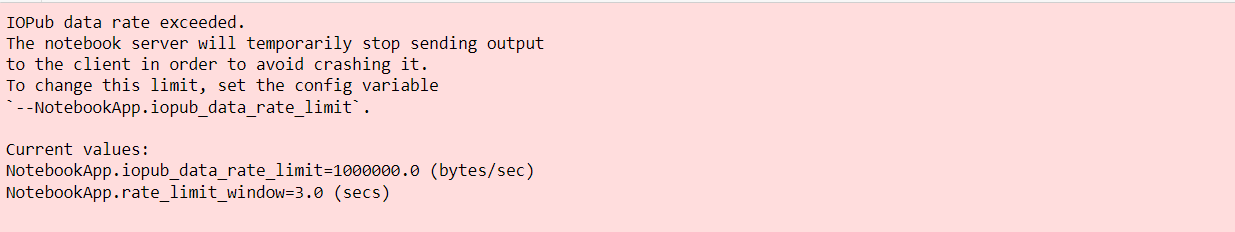

In [157]:
from IPython.display import Image
# Caminho para a imagem
caminho_imagem = 'erro_print_tree.png'
# Exibir a imagem
Image(filename=caminho_imagem)

No entanto de modo a demonstrar que a árvore de facto é gerada iremos repetir o processo, mas com uma limitação de profundidade:

In [158]:
# criar o objeto
tree = DecisionTree(max_depth = 3)

In [159]:
# treinar a árvore
tree.fit(df_connect4, balance = False)

In [160]:
# print da árvore criada
tree.show_tree()

<Attribute: a1>
       Value:  b
          <Attribute: g1>
                 Value:  b
                    <Attribute: d3>
                           Value:  x  -  Class:  win   ( 1182 )
                           Value:  o  -  Class:  loss   ( 1235 )
                           Value:  b  -  Class:  win   ( 7266 )
                 Value:  o
                    <Attribute: g2>
                           Value:  b  -  Class:  win   ( 3440 )
                           Value:  o  -  Class:  win   ( 1521 )
                           Value:  x  -  Class:  win   ( 2582 )
                 Value:  x
                    <Attribute: g2>
                           Value:  b  -  Class:  win   ( 3418 )
                           Value:  o  -  Class:  win   ( 2855 )
                           Value:  x  -  Class:  loss   ( 1483 )
       Value:  o
          <Attribute: b1>
                 Value:  b
                    <Attribute: d1>
                           Value:  x  -  Class:  win   ( 2599 )
    

### Testes <a name = "test_connect4"></a>
[[voltar a Connect4]](#dtc_connect4)

Uma vez que este dataset também apresenta multiclasses, iremos, novamente realizar um teste com o uso de OvA e outro sem.

In [161]:
train_df, test_df = train_test_split(df_connect4, test_size = 0.3)

In [162]:
train_df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
53305,b,b,b,b,b,b,x,x,b,b,...,b,b,b,x,o,b,b,b,b,loss
19185,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,draw
6168,x,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,loss
53964,x,b,b,b,b,b,x,x,b,b,...,b,b,b,o,x,b,b,b,b,win
66030,x,x,o,b,b,b,o,o,b,b,...,b,b,b,x,o,x,b,b,b,draw


In [163]:
test_df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
24786,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
46443,o,x,x,x,o,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,loss
4420,o,o,b,b,b,b,x,b,b,b,...,b,b,b,b,b,b,b,b,b,win
51961,o,b,b,b,b,b,x,o,x,b,...,b,b,b,x,b,b,b,b,b,win
36551,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


**TESTE 1:**

In [164]:
tree = DecisionTree(max_depth = 3)

In [165]:
tree.fit(train_df, balance = False)

In [166]:
tree.show_tree()

<Attribute: a1>
       Value:  b
          <Attribute: g1>
                 Value:  x
                    <Attribute: g2>
                           Value:  o  -  Class:  win   ( 2019 )
                           Value:  b  -  Class:  win   ( 2378 )
                           Value:  x  -  Class:  loss   ( 1029 )
                 Value:  b
                    <Attribute: d3>
                           Value:  b  -  Class:  win   ( 5089 )
                           Value:  o  -  Class:  win   ( 868 )
                           Value:  x  -  Class:  win   ( 840 )
                 Value:  o
                    <Attribute: g2>
                           Value:  o  -  Class:  win   ( 1059 )
                           Value:  b  -  Class:  win   ( 2417 )
                           Value:  x  -  Class:  win   ( 1768 )
       Value:  x
          <Attribute: d1>
                 Value:  b
                    <Attribute: g1>
                           Value:  x  -  Class:  win   ( 1843 )
       

In [167]:
predictions = tree.predict(test_df)

In [168]:
ac(predictions, test_df.iloc[:,-1])

0.6891158476416025

**TESTE 2:**

In [169]:
tree = DecisionTree(max_depth = 3)

In [170]:
tree.fit(train_df, balance = False, ova = True)

In [171]:
tree.show_tree()

Tree 1 

<Attribute: a1>
       Value:  b
          <Attribute: g1>
                 Value:  x
                    <Attribute: g2>
                           Value:  o  -  Class:  0   ( 2019 )
                           Value:  b  -  Class:  0   ( 2378 )
                           Value:  x  -  Class:  1   ( 1029 )
                 Value:  b
                    <Attribute: b1>
                           Value:  x  -  Class:  0   ( 2949 )
                           Value:  o  -  Class:  0   ( 2300 )
                           Value:  b  -  Class:  0   ( 1548 )
                 Value:  o
                    <Attribute: g2>
                           Value:  o  -  Class:  0   ( 1059 )
                           Value:  b  -  Class:  0   ( 2417 )
                           Value:  x  -  Class:  0   ( 1768 )
       Value:  x
          <Attribute: d1>
                 Value:  b
                    <Attribute: g1>
                           Value:  x  -  Class:  0   ( 1843 )
                 

In [172]:
predictions = tree.predict(test_df)

In [173]:
ac(predictions, test_df.iloc[:,-1])

0.6888198144858891

# Teste Final <a name = "teste"></a>
[[voltar ao índice]](#indice)

De modo a comprovar que as alterações feitas no Decision Tree classifier continam a funcionar nos datasets previamente testados, iremos refazer a árvore de decisão de 'Restaurant' e de 'Weather', pois o último código da Decision Tree foi utilizado tanto no dataset Iris, como em Connect4.

### Restaurant - Árvore Final <a name = "rest_ad"></a>
[[voltar a Teste Final]](#teste)

In [174]:
tree_restaurant = DecisionTree()

In [175]:
tree_restaurant.fit(df_rest)

In [176]:
tree_restaurant.show_tree()

<Attribute: Pat>
       Value:  Some  -  Class:  Yes   ( 4 )
       Value:  Full
          <Attribute: Hun>
                 Value:  Yes
                    <Attribute: Type>
                           Value:  French  -  Class:  No   ( 0 )
                           Value:  Thai
                              <Attribute: Fri>
                                     Value:  No  -  Class:  No   ( 1 )
                                     Value:  Yes  -  Class:  Yes   ( 1 )
                           Value:  Burger  -  Class:  Yes   ( 1 )
                           Value:  Italian  -  Class:  No   ( 1 )
                 Value:  No  -  Class:  No   ( 2 )
       Value:  None  -  Class:  No   ( 2 )


### Weather - Árvore Final <a name = "weather_ad"></a>
[[voltar a Teste Final]](#teste)

In [177]:
tree_weather = DecisionTree()

In [178]:
tree_weather.fit(df_weather)

In [179]:
tree_weather.show_tree()

<Attribute: Humidity>
       Value:  81.0 - 89.0
          <Attribute: Weather>
                 Value:  sunny  -  Class:  no   ( 2 )
                 Value:  overcast  -  Class:  yes   ( 1 )
                 Value:  rainy  -  Class:  no   ( 3 )
       Value:  89.0 - 97.0
          <Attribute: Weather>
                 Value:  sunny  -  Class:  no   ( 2 )
                 Value:  overcast  -  Class:  yes   ( 1 )
                 Value:  rainy
                    <Attribute: Windy>
                           Value:  False  -  Class:  yes   ( 1 )
                           Value:  True  -  Class:  no   ( 1 )
       Value:  73.0 - 81.0  -  Class:  yes   ( 3 )
       Value:  65 - 73.0
          <Attribute: Weather>
                 Value:  sunny  -  Class:  yes   ( 2 )
                 Value:  overcast  -  Class:  yes   ( 1 )
                 Value:  rainy  -  Class:  no   ( 1 )


# JOGO <a name = "jogo"></a>
[[voltar ao índice]](#indice)

Para que seja possível utilizar a árvore de decisão gerada anteriormente para prever qual o melhor movimento, precisamos primeiro de entender em que consiste este dataset.

Após visitar o website https://archive.ics.uci.edu/dataset/26/connect+4, disponibilizado no enunciado do trabalho, ficamos a saber que o nome dos atributos corresponde a uma posição no tabuleiro, estando essa de acordo com o seguinte modelo:

                                            6 . . . . . . .                  
                                            5 . . . . . . .                  
                                            4 . . . . . . .                  
                                            3 . . . . . . .                  
                                            2 . . . . . . .                  
                                            1 . . . . . . .                  
                                              a b c d e f g

Para além disso, percebemos que no dataset as colunas estão ordenadas de modo a representar o tabuleiro, começando por indicar os valores de todas as linhas da coluna a, depois da coluna b e assim sucessivamente.

Sabemos também que cada valor apenas pode tomar três opções sendo essas:

    - 'x' que representa o token do jogador X
    - 'o' que represneta o token do jogador O
    - 'b' que indica que não tem nenhuma peça nessa posicão

Relativamente à classificação do tabuleiro existem três opções:

    - 'win' - indica que o jogador X ganhou
    - 'loss' - indica que o jogador O ganhou
    - 'draw' - indica que houve empate
    
Estas classificações são teóricas e são assim atribuidas pois é nos dito que o resultado do jogo depende do primeiro jogador, sendo esse o jogador X.

**-> Visualização do dataset em matrix**

De acordo com o website sabemos também que no dataset encontram-se todas as posições possiveis das peças em 8 jogadas, nas quais nenhum jogador ganhou e cujo movimento seguinte não é forçado. Tendo isto em conta comprova-se que a classificação de cada exemplo do dataset é apenas teórica, isto é, para aquela determinada disposição das peças é mais provável aquele resultado.

Vamos comprovar a veracidade do que foi dito através da visualização de alguns dos tabuleiros representados neste dataset. Para isso iremos usar a seguinte função auxiliar:

In [180]:
# Função que recebe uma linha do dataset e imprime-a no formato de matriz correspondente
def print_in_matrix_form(example):
    matrix = [[None for _ in range(6)] for _ in range(6)]
    pos = 0 
    for line in range(0,6,1):
        for column in range(5,-1,-1):
            matrix[column][line] = example.iloc[pos]
            pos += 1
    
    string = ""
    for column in range(6):
        for line in range(6):
            string += matrix[column][line] + " "
        string += "\n"
    print(string)

Vamos escolher 3 exemplos do dataset aleatóriamente:

In [181]:
for i in range(1,4):
    print(f"EXEMPLO {i}:")
    print_in_matrix_form(df_connect4.iloc[random.randrange(len(df_connect4))])
    print()

EXEMPLO 1:
b b b b b b 
b b b b b b 
b b b b x b 
b b b b o b 
o b b b o b 
x b x b o x 


EXEMPLO 2:
b b b b b b 
x b b b b b 
x b b b b b 
o b b b b b 
o b b b b b 
x x o o b b 


EXEMPLO 3:
b b b b b b 
b b b b b b 
b b b b b b 
b b b b b b 
b b b b b b 
o b x o b x 




Confirmámos que os dados se encontram nas condições indicadas.

**Vamos agora tentar atingir o objetivo por partes**

**Passo 1:** Começamos por ir buscar o código do Minimax por nós desenvolvido utilizado no trabalho anterior:

In [182]:
import math
class Minimax():
    # baseado no pseudocódigo da Wikipedia
    def __init__(self, game, mode=3): 
        # mode: 1==h1 sem pruning, 2==h2 sem pruning, 3==h1 com pruning, 4==h2 com pruning, 5==h3, 6== h3 com pruning
        self.g = game   # guarda o estado em que o jogo chega
        self.mode = mode

    def terminal_node(self):
        return (self.g.moves_left == 0) or self.g.check_win()

    # As vitórias passam a receber uma penalização de acordo com a necessidade que o 
    # algoritmo teve de aprofundar -> mais profundo == menos pontos

    def choose_best_move(self, depth, alpha=-math.inf, beta=math.inf, y=0, x=0):   
        if self.g.moves_left == 0: return (None,0)    # empate, não calcula mais nada
        
        # inicialização de variáveis como tabuleiro e lista de posições possíveis
        game=self.g
        possible_moves= [game.pm[i] for i in range(7) if game.pm[i][0] != -1] # posições possíveis: ([y,x])
       
        if self.terminal_node():
            if game.current_player=='X': # peça X, pontuação positiva, vence
                return (None, 100000000000000 - (4-depth))  # penalizado se aprofundar mais (escolhe caminho mais curto)

            else: # peça O, pontuação negativa, vence
                return (None, -100000000000000 + (4-depth)) 

        elif depth==0:  # final da propagação retorna apenas a pontuação heurística do movimento
            if self.mode in [1,3]: return (None, evaluate_move(y, x, game.board, game.current_player)) # heurística 1
            elif self.mode in [2,4]: return (None, new_evaluation(game.board, game.current_player)) # heurística 2
            else: return (None, best_evaluation(game.board, game.current_player)) # heurística 3

        if game.current_player=='X': 
            value= -math.inf
            column=random.choice(possible_moves)[1] # escolhe coluna possível aleatória
            while len(possible_moves)!=0:
                move=random.choice(possible_moves)
                possible_moves.remove(move)
                y,x=move[0],move[1]
                new_board=deepcopy(game)
                new_board.make_play(move[1],False)  # escolhe coluna de dentro das possíveis
                
                # decisões diferentes para cada modo (requer atributos diferentes)
                if self.mode==1: new_score=Minimax(new_board, 1).choose_best_move(depth-1, 0, 0, y, x)[1]
                elif self.mode==2: new_score=Minimax(new_board, 2).choose_best_move(depth-1)[1]
                elif self.mode==3: new_score=Minimax(new_board, 3).choose_best_move(depth-1, alpha, beta, y, x)[1]
                elif self.mode==4: new_score=Minimax(new_board, 4).choose_best_move(depth-1, alpha, beta)[1]
                elif self.mode==5: new_score=Minimax(new_board, 5).choose_best_move(depth-1,)[1]
                elif self.mode==6: new_score=Minimax(new_board, 6).choose_best_move(depth-1, alpha, beta)[1]
                
                if new_score > value:
                    value=new_score
                    column=move[1]

                if self.mode in [3,4,6]: # se for um modo com pruning ativo
                    alpha = max(alpha, value)
                    if alpha > beta: break

            return column, value
        
        else:
            value= math.inf
            column=random.choice(possible_moves)[1] # escolhe coluna possível aleatória
            while len(possible_moves)!=0:
                move=random.choice(possible_moves)
                possible_moves.remove(move)
                y,x=move[0],move[1]
                new_board=deepcopy(game)
                new_board.make_play(move[1],False)  # escolhe coluna de dentro das possíveis
                
                
                # decisões diferentes para cada modo (requer atributos diferentes)
                if self.mode==1: new_score=Minimax(new_board, 1).choose_best_move(depth-1, 0, 0, y, x)[1]
                elif self.mode==2: new_score=Minimax(new_board, 2).choose_best_move(depth-1)[1]
                elif self.mode==3: new_score=Minimax(new_board, 3).choose_best_move(depth-1, alpha, beta, y, x)[1]
                elif self.mode==4: new_score=Minimax(new_board, 4).choose_best_move(depth-1, alpha, beta)[1]
                elif self.mode==5: new_score=Minimax(new_board, 5).choose_best_move(depth-1, 0, 0, y, x)[1]
                elif self.mode==6: new_score=Minimax(new_board, 6).choose_best_move(depth-1, alpha, beta, y, x)[1]
                
                if new_score <= value: 
                    value=new_score
                    column=move[1]
                
                if self.mode in [3,4,6]: # se for um modo com pruning ativo    
                    beta = min(beta, value)
                    if alpha > beta: break

            return column, value

**Passo 2:** Sabemos que para o Minimax funcionar precisamos também da função da Heurística utilizada, neste caso iremos utilizar o modo 6 que usava a Heurística 3:

In [183]:
# atribui a pontuação ao segmento de 4 de acordo com a heuristica
def evaluate_segment(segment, player_token):
    numO=segment.count('O')
    numX=segment.count('X')
    pts={0:0, 1:1, 2:10, 3:50, 4:512}
    if (numO==numX==0): return 0       # Segmento vazio (mais aplicável para segunda heurística)
    elif (numO==0): return pts[numX]   # Se não houver peças 'O'
    elif (numX==0): return -pts[numO]    # Se não houver peças 'X' 
    return 0      # Mistura de peças no segmento

# pesquisa no tabuleiro da Heurística 1
def best_evaluation(board, ai_piece):
    score = 0   # vai guardar a pontuação final se colocarmos a peça naquela posição
    
    # Horizontais (esquerda para direita)
    for y in range(6): 
        for x in range(4):  
            segment = [board[y][x + i] for i in range(4)] 
            score += evaluate_segment(segment,ai_piece)

    # Verticais (cima para baixo)
    for x in range(7):  
        for y in range(3):  
            segment = [board[y + i][x] for i in range(4)]
            score += evaluate_segment(segment,ai_piece)

    # Diagonais com sentido positivo (baixo para cima)
    for y in range(3): 
        for x in range(4):  
            segment = [board[y + i][x + i] for i in range(4)]
            score += evaluate_segment(segment,ai_piece)

    # Diagonais com sentido negativo (cima para baixo)
    for y in range(3):  
        for x in range(4): 
            segment = [board[y + i][x + 3 - i] for i in range(4)]
            score += evaluate_segment(segment,ai_piece)

    move_bonus = 16 if ai_piece == 'X' else -16
    return score + move_bonus

**Passo 3:** Para que o Minimax funcione precisamos também da classe ConnectFour que utilizamos para definir o jogo:  

In [184]:
# Classe que cria o jogo e o gere
class ConnectFour:
    def __init__(self):
        self.board = [['-' for _ in range(7)] for _ in range(6)]    # tabuleiro
        self.current_player = 'X'   # se for 'X' é um jogador, se for 'O' é outro
        self.moves_left = 42    # número de jogadas que faltam fazer
        self.pm = {0: [5,0], 1: [5,1], 2: [5,2], 3: [5,3], 4: [5,4], 5: [5,5], 6: [5,6]}    # dicionário que guarda os movimentos possiveis, ou seja, onde a peça pode cair 
        self.e = False  # Indica se o jogo acabou ou não ("end")

    # dá print ao estado atual do tabuleiro
    def print_board(self):
        for row in self.board:
            print("| " + " | ".join(row) + " |")
        print("=" * 29)
        print("  0   1   2   3   4   5   6")

    # muda do jogador1 para o jogador2 e vice-versa
    def change_player(self):
        self.current_player = 'O' if self.current_player == 'X' else 'X'

    # atualiza os novos possiveis movimentos, consoante a coluna onde foi feita a última jogada
    def update_pm(self, column):
        y, x = self.pm[column]
        self.pm[column] = [y-1, x]

    # introduz a nova jogada no tabuleiro
    def update_board(self, y, x):
        self.board[y][x] = self.current_player

    # vê se o movimento é possivel, se for atualiza o jogo
    def make_move(self, column, player = True):
        if not 0 <= column < 7: 
            print("\nColuna inválida. Tente novamente.")
            return False
        
        if self.pm[column][0] == -1:  # não é possivel colocar mais peças nessa coluna
            if player:
                print("\nColuna cheia. Tente novamente.")
            return False

        # movimento é possivel 
        y, x = self.pm[column]
        self.update_board(y, x)  # introduz o movimento no tabuleiro
        self.update_pm(column)  # atualiza as novas jogadas possiveis
        self.moves_left -= 1  # retira-se o movimento
        return True

    # vê se o jogador venceu o jogo
    def check_win(self):
        # Verifica a horizontal
        for row in range(6):
            for col in range(4):
                if all(self.board[row][col + i] == self.current_player for i in range(4)):
                    return True
        # Verifica a vertical
        for row in range(3):
            for col in range(7):
                if all(self.board[row + i][col] == self.current_player for i in range(4)):
                    return True
        # Vê as diagonais com sentido da esquerda para a direita
        for row in range(3):
            for col in range(4):
                # com declive negativo
                if all(self.board[row + i][col + i] == self.current_player for i in range(4)):
                    return True
                # com declive positivo
                if all(self.board[row + i][col + 3 - i] == self.current_player for i in range(4)):
                    return True
        return False
    
    # função que gere o jogo
    def make_play(self, column, player=True):
        if self.make_move(column, player):  # se o movimento foi possivel
            if player: self.print_board()  # imprime a jogada feita
            if self.moves_left == 0:    # vê se o jogo resultou em empate
                if player: print("\nEmpate!") # caso o jogo não tenha acabado e as jogadas se tenham esgotado
                self.e = True
                return
            if self.check_win():    # vê se o jogo foi ganho
                if player: print(f"\nO jogador {self.current_player} ganhou!")
                self.e = True
                return
            self.change_player() # a jogada foi feita e o jogo não acabou, mudamos o jogador
            return True
        return False

**Passo 4:** Como vamos fazer com que o jogo funcione? 

Como já dissemos, para o Minimax funcionar irá utilizar a Heurística e o formato do jogo ConnectFour, logo facilmente irá determinar qual será a melhor jogada a realizar, mas como iremos fazer o mesmo com a DecisionTree?

Após pensarmos como resolver o problema, chegamos à conclusão que a solução mais viavel seria utilizar a função **'predict'**, ou seja, iremos ver o estado atual do tabuleiro e criar novos tabuleiros, cada um, com uma das jogadas possiveis, de seguida iremos dar cada um desses tabuleiros à árvore de decisão e deixá-la atribuir uma classificação.
    
   - Se houver classificações do tipo 'win' iremos escolher aleatóriamente uma dessas
   - Caso não haja classificações do tipo 'win' e haja tanto 'draw' como 'loss' iremos escolher aleatóriamente uma das jogadas que resultou em 'draw', pois consideramos que é melhor empatar que perder.
   - Se só houver um tipo de classificação iremos escolher aleatóriamente uma das jogadas possiveis.
   
**NOTA:** uma vez que de acordo com o dataset as classifiações são atribuidas ao jogador 'X' quando este começa, em todos os jogos irá começar o jogador 'X' e a jogada será definida pelo 'DecisionTree', todas as jogadas 'O' serão definidas pelo 'Minimax'.

Começamos então por definir uma função que permite definir qual a melhor jogada através da DecisionTree. Nesta porção de código vamos buscar o objeto de jogo da classe ConnectFour e transformamos cada um dos tabuleiros criados num formato que a árvore seja capaz de reconhecer, deste modo, é possivel atribuir classificações a cada tabuleiro.

In [185]:
def best_move_dt(game, tree, show = False):
    predictions = {} # Dicionário que guarda as classificações dadas a cada jogada possivel
    
    # Este dicionário diz me a que posições corresponde cada atributo do dataset
    transform = {'a1': [5, 0], 'a2': [4, 0], 'a3': [3, 0], 'a4': [2, 0], 'a5': [1, 0], 'a6': [0, 0],
             'b1': [5, 1], 'b2': [4, 1], 'b3': [3, 1], 'b4': [2, 1], 'b5': [1, 1], 'b6': [0, 1],
             'c1': [5, 2], 'c2': [4, 2], 'c3': [3, 2], 'c4': [2, 2], 'c5': [1, 2], 'c6': [0, 2],
             'd1': [5, 3], 'd2': [4, 3], 'd3': [3, 3], 'd4': [2, 3], 'd5': [1, 3], 'd6': [0, 3],
             'e1': [5, 4], 'e2': [4, 4], 'e3': [3, 4], 'e4': [2, 4], 'e5': [1, 4], 'e6': [0, 4],
             'f1': [5, 5], 'f2': [4, 5], 'f3': [3, 5], 'f4': [2, 5], 'f5': [1, 5], 'f6': [0, 5],
             'g1': [5, 6], 'g2': [4, 6], 'g3': [3, 6], 'g4': [2, 6], 'g5': [1, 6], 'g6': [0, 6]}
    
    possible_moves= [game.pm[i] for i in range(7) if game.pm[i][0] != -1] # posições possíveis: ([y,x])
    for move in possible_moves:
        new_game = deepcopy(game)
        new_game.make_move(move[1])
        board = new_game.board
        
        # Temos de passar o tabuleiro do jogo para um formato que funcione na DecisionTree
        data = {}  # Vai guardar o tabuleiro em formato de dataset
        for key, pos in transform.items():
            y = pos[0]
            x = pos[1]
            piece = board[y][x]
            if piece == 'X': piece = 'x'
            elif piece == 'O': piece = 'o'
            elif piece == '-': piece = 'b'
            data[key] = [piece]
        
        example = pd.DataFrame(data)
        predictions[move[1]] = tree.predict(example)[0]    # fazêmos [0] para ir buscar só o valor, é indifernete estar em lista
    
    if show:
        print(predictions)
    
    # Agora que temos todas as diferentes previsões temos de decidir onde jogar (vamos seguir o que foi explicado em cima)
    possible_answer = [key for key, value in predictions.items() if value == 'win'] # vamos buscar todas as predictions com 'win'
    if len(possible_answer) != 0: # houve 'win'
        best_move =  random.choice(possible_answer)
    else:  # não havia 'win'
        possible_answer = [key for key, value in predictions.items() if value == 'draw'] 
        if len(possible_answer) != 0:
            best_move =  random.choice(possible_answer)
        else:
            possible_answer = [key for key, value in predictions.items() if value == 'loss']
            best_move =  random.choice(possible_answer)
    
    # Já sabemos onde jogar, agora retornamos a resposta (coluna onde jogar)
    return best_move

Esta será a função que iremos utilizar para ver o jogo a decorrer:

In [186]:
def start_game(tree, show = False):
    if show:
        print()
        print("--- Decision Tree VS Minimax ---")
        print()
    game = ConnectFour()
    win = "Minimax"
    if show:
        game.print_board()  # dá print ao tabuleiro no inicio do jogo (que se encontra vazio)
    control = 1 # Quando for 1 joga o player 1, quando for -1 joga o player 2
    while not game.e:
        if control == 1:
            if show:
                print(f"Vez do jogador: {game.current_player} - Decision Tree")
            column = best_move_dt(game, tree, show)
            win = "Decision Tree"
        else:
            if show:
                print(f"Vez do jogador: {game.current_player} - Minimax")
            minimax = Minimax(game, 6)
            column, _ = minimax.choose_best_move(4)
            win = "Minimax"
        game.make_play(column, show)
        control *= -1
    if game.moves_left == 0 and game.check_win == False:
        win = "Empate"
    return win

### Teste do Jogo <a name = "jogo_teste"></a>
[[voltar a Jogo]](#jogo)

Iremos deixar aqui um exemplo do jogo, onde pode ver quais as jogadas realizadas e as predictions feitas pela DecisionTree, de modo a perceber se de facto ela fez a escolha que esperavamos. 

In [187]:
start_game(tree_connect4, show = True)


--- Decision Tree VS Minimax ---

| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
  0   1   2   3   4   5   6
Vez do jogador: X - Decision Tree
{0: 'win', 1: 'win', 2: 'win', 3: 'win', 4: 'win', 5: 'win', 6: 'win'}
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | X |
  0   1   2   3   4   5   6
Vez do jogador: O - Minimax
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | O | - | - | X |
  0   1   2   3   4   5   6
Vez do jogador: X - Decision Tree
{0: 'win', 1: 'win', 2: 'win', 3: 'win', 4: 'win', 5: 'win', 6: 'loss'}
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - | - | - | - | - |
| - | - | - 

'Minimax'

### Qual foi o melhor? <a name = "best"></a>
[[voltar a Jogo]](#jogo)

Como podemos ver, o jogo é realizado com sucesso. Mas qual é melhor? O Minimax ou o DecisionTree?

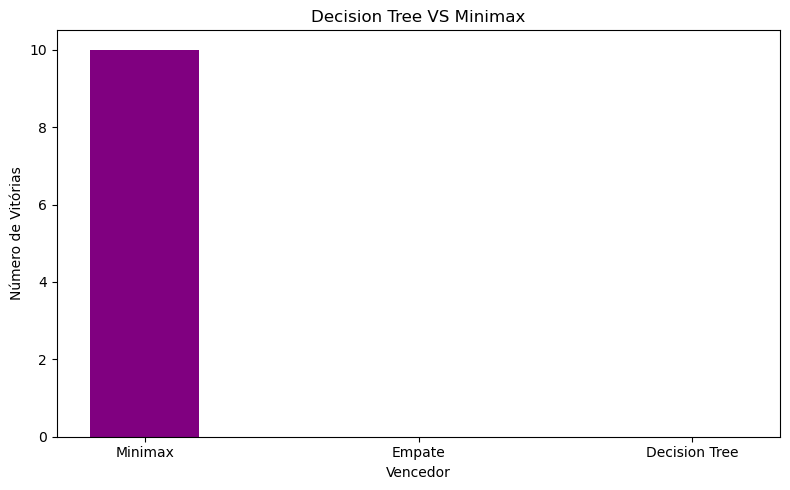

In [188]:
wins_minimax = 0
wins_dt = 0
empates = 0
for i in range(10):
    result = start_game(tree_connect4)
    if result == "Minimax":
        wins_minimax += 1
    elif result == "Decision Tree":
        wins_dt += 1
    else:
        empates += 1
        
plt.figure(figsize=(8, 5))

# Gráfico de barras para as vitórias
plt.bar(['Minimax', 'Empate', 'Decision Tree'], [wins_minimax,empates, wins_dt], color=['purple', 'green'], width=0.4)
plt.xlabel('Vencedor')
plt.ylabel('Número de Vitórias')
plt.title('Decision Tree VS Minimax')

plt.tight_layout()
plt.show()

Como seria de esperar o Minimax ganhou todos os jogos. Tendo em conta que o dataset Connect4 apenas contém estados do tabuleiro nos quais foram realizadas exatamente 8 jogadas, como descrito previamente, seria de esperar que a sua DecisionTree não tivesse capacidade de escolher factualmente a melhor jogada. Talvez se o dataset tivesse uma classificação para tabuleiros nos quais o número de peças varia, por exemplo, 1 peça, duas peças ... a sua performance fosse melhor. Contudo, tendo em conta aquilo que nos é dados podemos afirmar que a decision tree do connect4 não tem a capacidade de prever qual a melhor jogada.

# Faça os seus Testes <a name = "faça_testes"></a>
[[voltar ao índice]](#indice)

Nesta parte do trabalho incentivamos a que experiemente os seus próprios datastes ou que experimente atribuir dataframes de teste às árvores que já foram analisadas. Para isso, tenha em conta a seguinte informação:

Em ambas as seguintes funções pode dar um dataframe de teste, como aqueles obtidos quando se usa a função train_test_split do sklearn.
- tree.predict() - É uma função que retorna uma lista com as classificações esperadas.
- tree.accuracy() - Em vez de returnar uma lista com as classificações esperadas, ele faz um predict das classificações e calcula em quantas acertou, devolvendo assim apenas a accuracy.

Se quiser aceder aos dataframes por nós utilizados ou às suas árvores tenha em conta a seguinte tabela para saber quais as suas designações:

                                    Nome do dataset             Nome da árvore
                                -------------------------------------------------
                                    df_rest                     tree_restaurant
                                    df_weather                  tree_weather
                                    df_iris                     tree_iris
                                    df_connect4                 tree_connect4

Nota: Pode ser necessário dar run ao notebook para ter acesso às decision trees

Relembramos que é possivel utilizar OVA colocando 'ova = True' em fit, ou seja, tree.fit(dados_treino, ova = True), também pode desativar o SMOTE colocando 'balance = False' em fit, ou seja, tree.fit(dados_treino, balance = False)

**Se quiser fazer testes nas árvores já geradas pode fazê-lo aqui**

Retire de formato de comentário, substitua '*' pelo nome da árvore que está a usar e acrescente o dataframe de teste que quer usar em 'teste'.

In [189]:
# tree_*.predict(teste)
# tree_*.accuracy(teste)

**Se quiser dar import de um novo dataset e testar**

Retire do formáto de comentário e introduza com os dados que necessita.

In [190]:
# Leitura do dataset
# df_rest = pd.read_csv("nome.csv")

In [191]:
# tree = DecisionTree()

In [192]:
# tree.fit()

In [193]:
# tree.predict(teste)
# tree.accuracy(teste)

# Conclusão <a name = "conclusão"></a>
[[voltar ao índice]](#indice)

Através da elaboração deste projeto, fomos capazes de desenvolver competências úteis para futuras análises de dados, implementação e otimização de árvores de pesquisa ID3 e aprimorar a nossa capacidade de reconhecimento de complicações de datasets e possíveis soluções. Produto de sucessivas implementações de melhorias, o código final representa uma árvore capaz de receber qualquer dataset (se for corretamente passado à função) e realizar classificações após o processo de treino. É também possível visualizar a árvore criada durante esse processo.

Posto isto, conseguimos:

 - Identificar os vários tipos de complicações que podem afetar uma árvore ID3, e sucessivamente proceder à mitigação dos problemas de cada dataset fornecido;

 - Realizar testes com os dataset com a finalidade de provar que a árvore final não perdeu capacidades, apenas foi adaptada a lidar com os problemas identificados;

 - Implementar um sistema, aliado à nossa anterior implementação do **algoritmo Minimax**, capaz de utilizar a árvore criada com o dataset connect4 e os resultados das suas previsões para efetuar jogadas num tabuleiro do respetivo jogo.